# Business Case: Employee Performance Analysis at INX Future Inc.

* **Background:**
INX Future Inc. is a leading data analytics and automation solutions provider with over 15 years of global business presence. The company has been recognized as one of the top 20 best employers for the past five years due to its employee-friendly policies and industry-leading HR practices.

* **Current Situation:**
In recent years, employee performance indexes at INX Future Inc. have shown a decline. This has led to an increase in service delivery escalations and an 8-percentage-point drop in client satisfaction levels. While the CEO, Mr. Brain, acknowledges the issues, he is hesitant to penalize non-performing employees as it may negatively impact overall employee morale and the company's reputation as a top employer.

* **Opportunity:**
To address these concerns, INX Future Inc. has decided to launch a data science project aimed at analyzing employee data to uncover the root causes of performance issues. This project will enable data-driven decision-making to improve workforce efficiency while maintaining a positive workplace culture.

**Expected Insights:**

* Department-wise performance analysis to identify areas of concern.

* Identification of the top three factors affecting employee performance.

* Development of a predictive model to forecast employee performance based on key input factors, aiding in future hiring decisions.

* Actionable recommendations to enhance employee performance based on analytical findings.

# Problem Definition:

* **Problem Statement:**
The decline in employee performance at INX Future Inc. has led to a significant reduction in client satisfaction and an increase in service escalations. The company requires a data-driven approach to identify the root causes of this decline, predict employee performance, and implement effective strategies for improvement without negatively impacting employee morale.

**Importing necessary libraries**

In [1]:
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np # for numrical and statistical calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import warnings # for the warnings
warnings.filterwarnings('ignore') # use for ignore the warning
from google.colab import files
uploaded = files.upload()

In [2]:
data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls", engine="xlrd") # Load the xls file

In [3]:
pd.set_option('display.max_columns', None) # for see all columns

## Data Understanding
* **Explore the Data:**
  * Check the data types of each column.
  * Understand the categorical and numerical features.
  * Identify missing values or inconsistencies.

### **Basic check**

In [4]:
data.head() # See the data top rows

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [5]:
data.tail() # See the data last rows

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   9   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
1195      Yes                        20                            2   
1196       No                        17                            1   
1197      Yes                        11                            3   
1198       No                        14                            2   
1199       No                        14                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager Attrition  \
1195                        0                     4        No   
1196                        0                     0        No   
1197                        3                     8        No   
1198                        7                     7        No   
1199                        2                     0       Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2

In [6]:
data.info() # Check the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**Insights and Column Explanation for Employee Performance Data**

**Column Descriptions:**

* **EmpNumber (object)** – Unique identifier for each employee.

* **Age (int64)** – Age of the employee.

* **Gender (object)** – Gender of the employee (e.g., Male, Female, Other).

* **EducationBackground (object)** – Employee’s field of education.

* **MaritalStatus (object)** – Employee’s marital status (Single, Married, Divorced, etc.).

* **EmpDepartment (object)** – Department in which the employee works.

* **EmpJobRole (object)** – Specific job role of the employee.

* **BusinessTravelFrequency (object)** – Frequency of business travel (e.g., Rarely, Frequently).

* **DistanceFromHome (int64)** – Distance from home to workplace (in miles or km).

* **EmpEducationLevel (int64)** – Education level on a scale (e.g., 1 to 5).

* **EmpEnvironmentSatisfaction (int64)** – Satisfaction with the work environment (1 to 4 scale).

* **EmpHourlyRate (int64)** – Hourly salary rate of the employee.

* **EmpJobInvolvement (int64)** – Job involvement level (1 to 4 scale).

* **EmpJobLevel (int64)** – Level of the job within the organization (1 to 5 scale).

* **EmpJobSatisfaction (int64)** – Satisfaction with the job (1 to 4 scale).

* **NumCompaniesWorked (int64)** – Number of previous companies the employee has worked for.

* **OverTime (object)** – Whether the employee works overtime (Yes/No).

* **EmpLastSalaryHikePercent (int64)** – Last salary hike percentage.

* **EmpRelationshipSatisfaction (int64)** – Satisfaction with work relationships (1 to 4 scale).

* **TotalWorkExperienceInYears (int64)** – Total years of work experience.

* **TrainingTimesLastYear (int64)** – Number of training programs attended in the last year.

* **EmpWorkLifeBalance (int64)** – Work-life balance rating (1 to 4 scale).

* **ExperienceYearsAtThisCompany (int64)** – Years of experience at the current company.

* **ExperienceYearsInCurrentRole (int64)** – Years of experience in the current role.

* **YearsSinceLastPromotion (int64)** – Number of years since the last promotion.

* **YearsWithCurrManager (int64)** – Number of years the employee has worked with the current manager.

* **Attrition (object)** – Whether the employee has left the company (Yes/No).

* **PerformanceRating (int64)** – Performance rating of the employee (scale 1 to 5).

**Key Insights:**

* Department-wise Performance Trends: Some departments may have higher performance ratings, while others may struggle due to workload, leadership, or lack of training.

* Influence of Work-Life Balance: Employees with low work-life balance scores may exhibit higher attrition rates and lower job satisfaction.

* Impact of Overtime: Employees who frequently work overtime might show decreased satisfaction and increased attrition risk.

* Promotion & Salary Hike Correlation: Employees who haven't received a salary hike or promotion in years may have lower engagement and performance levels.

* Training Effectiveness: Employees who attended more training sessions might show improved job performance and satisfaction.

* Experience & Performance Link: Employees with more years in a company or role may have higher job satisfaction but could also be at risk of stagnation.

* Attrition & Performance: Identifying key attributes of employees who left the company can help in retention strategies and improve overall workforce stability.

In [7]:
data.isnull().sum() # Identify missing values or inconsistencies.

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

#### **Insights**
  * There are no null values in column

In [8]:
data.describe() # Here we can can see the statistical information of numerical columns

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

### Key Insights:

* **Age & Experience:**

  * The average employee age is 36.9 years, with a broad range from 18 to 60.
  * The average total work experience is 11.3 years, with some employees having up to 40 years of experience.
  * Employees generally have 7 years of experience at the company, but some have been with the same manager for up to 17 years.

* **Job Satisfaction & Involvement:**

  * Employees report an average job satisfaction of 2.73 (on a scale of 1 to 4), indicating a mix of satisfied and dissatisfied employees.
  * Job involvement is moderately high at 2.73 (scale of 1 to 4), but varies across individuals.
  * Environment satisfaction averages at 2.71, with a significant number of employees rating it at the lowest level (1), indicating potential workplace concerns.

* **Salary & Promotion Trends:**

  * Employees receive an average salary hike of 15.2%, ranging from 11% to 25%.
  * Promotion frequency is low, with some employees waiting up to 15 years for a promotion.
  * Job levels vary widely, with some employees at level 1 (entry) and others at level 5 (senior management).

* **Work-Life Balance & Overtime Impact:**

  * Work-life balance scores average 2.74 (on a 1-4 scale), with some employees struggling at the lowest rating of 1.
  * Employees who work overtime or have lower work-life balance ratings may be at risk for attrition or burnout.

* **Commute & Business Travel Impact:**

  * Employees travel an average of 9.16 miles from home, but some travel up to 29 miles, which could affect job satisfaction.
  * Business travel frequency could be impacting engagement levels, but further analysis is needed.

* **Training & Development:**

  * The average number of training sessions attended per year is 2.78, but some employees receive no training at all, which could impact job performance and career growth.
  * Employees with more training may show better performance and job satisfaction.

* **Performance Rating Distribution:**

  * Most employees receive a performance rating of 3, with some achieving the highest rating of 4 and very few at the lowest rating of 2.
  * This suggests a possible leniency bias or a lack of differentiation in performance evaluations.

In [9]:
data.describe(include="O") # Here we can can see the statistical information of categorical columns

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

### Key Insights:

* **Gender Distribution:**
  * The workforce is predominantly male (725 employees), suggesting potential gender imbalance.
  * Female employees account for the remaining 475 employees.

* **Education Background:**

  * The most common education background is Life Sciences (492 employees), followed by other fields.
  * The diversity in education backgrounds suggests a broad range of skills in the workforce.

* **Marital Status:**

  * A significant portion of employees are married (548 employees), which could impact work-life balance needs.
  * Single employees (remaining proportion) may have different career and engagement expectations.

* **Departmental Distribution:**

  * The Sales department has the highest number of employees (373), making it a critical area for performance improvements.
  * Other departments are more evenly distributed but require further analysis for performance trends.

* **Job Role Distribution:**

  * The most common job role is Sales Executive (270 employees), which aligns with the high number of employees in the Sales department.
  * There are 19 different job roles, indicating a diverse organizational structure.

* **Business Travel & Work Commitment:**

  * 846 employees travel rarely, suggesting minimal business travel for most employees.
  * Employees with frequent travel may experience work-life balance challenges.

* **Overtime Trends:**

  * The majority of employees (847) do not work overtime, which is a positive indicator of work-life balance.
  * However, 353 employees do work overtime, which may contribute to burnout and attrition risks.

* **Attrition Trends:**

  * 1022 employees have not left the company, indicating a relatively low attrition rate.
  * 178 employees have left, highlighting areas where engagement and retention strategies may need improvement.

## Data Exploration and Cleaning

* **Objective:** Understand the dataset and identify any missing or inconsistent values.

* **Actions:**
  * Perform exploratory data analysis (EDA) to summarize the main characteristics of the dataset.
  * Identify and handle missing values using techniques such as imputation or removal.
  * Convert categorical variables (e.g., thal, chest pain type) into numerical representations if necessary.

## Exploratory Data Analysis (EDA)
### **Univariate Analysis:**
  * Visualize distributions of features.

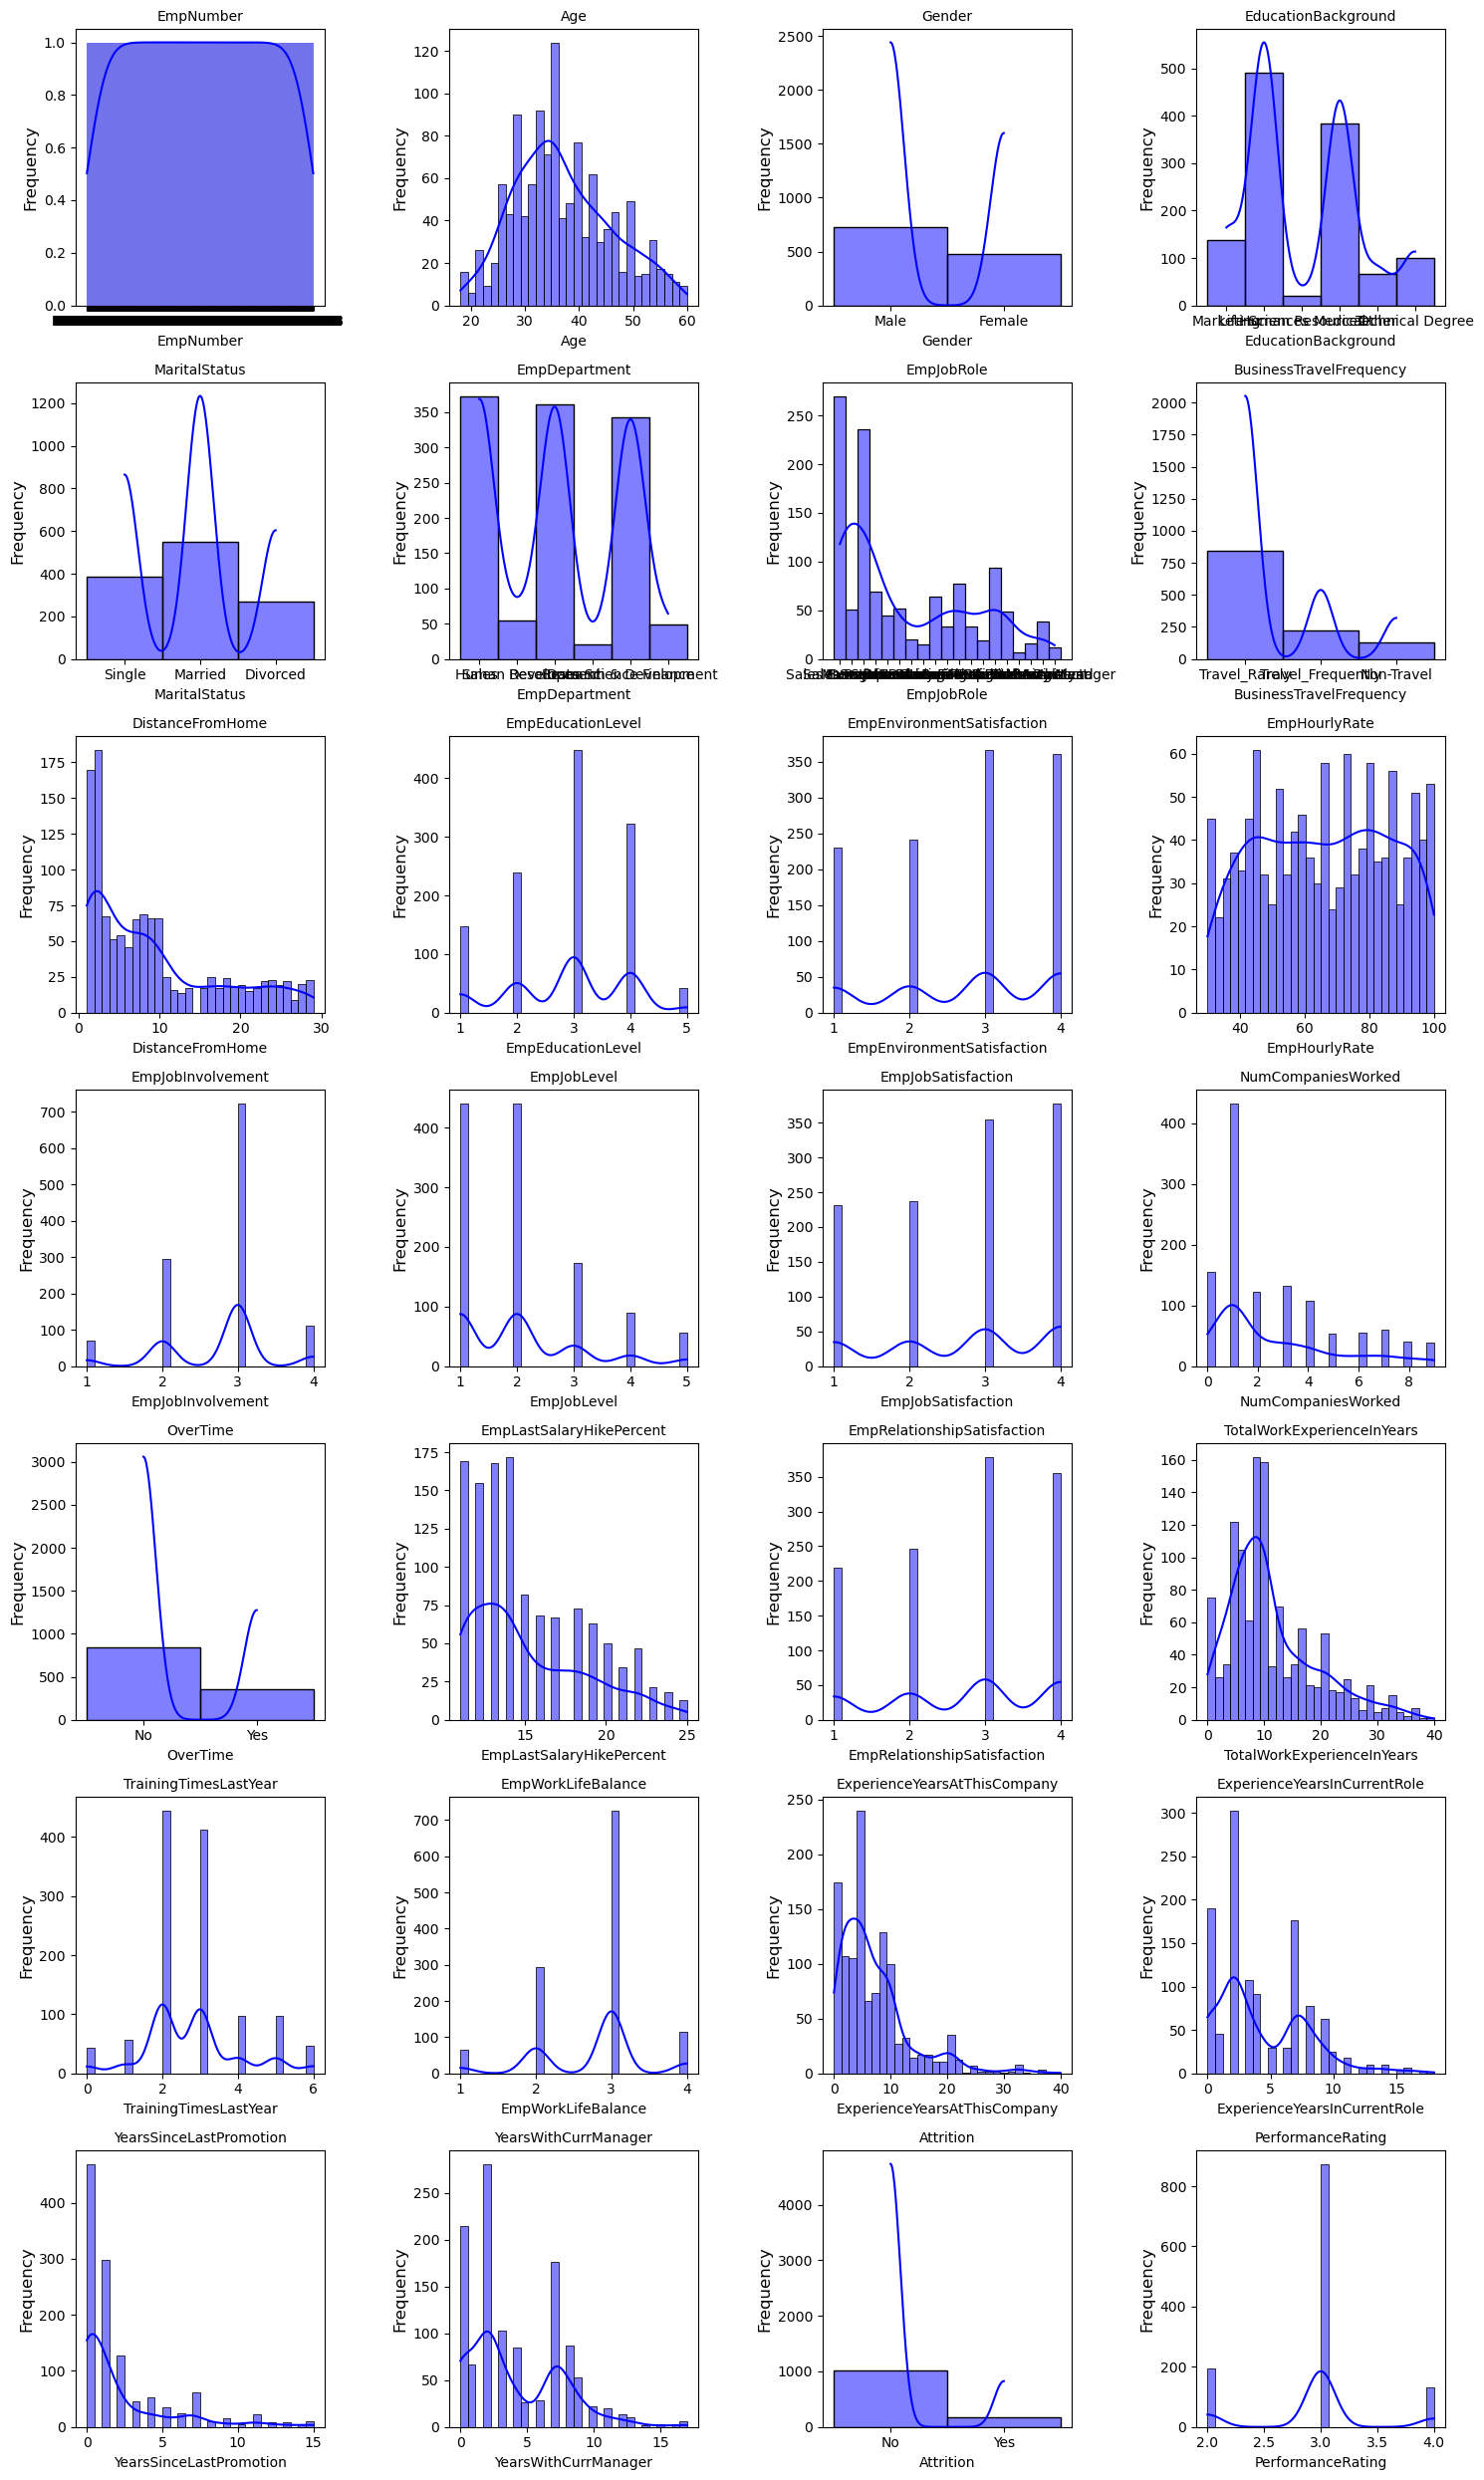

In [10]:
plt.figure(figsize=(15, 25))  # figure size

# Set the number of features and determine the layout
num_features = len(data.columns) # calculate the number of columns
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num) # here we set the sub plot
    sns.histplot(data[feature], kde=True, bins=30, color='blue')  # Using sns.histplot with kde
    plt.title(feature, fontsize=10) # set the size of title
    plt.ylabel('Frequency', fontsize=12) # set the size of y

# Show all plots at once
plt.tight_layout()  # This helps in adjusting subplots to fit into the figure area.
plt.show() # show the the graph

### Insights

* **Age Distribution:** The majority of employees are between 30 and 40 years old, with fewer employees above 50. This suggests a relatively young workforce.
* **Gender Imbalance:** There are significantly more male employees than female employees. Gender diversity may need improvement.
* **Education Background:** Most employees come from Life Sciences and Medical backgrounds, with fewer from Marketing and Technical fields.
* **Marital Status:** Married employees form the largest group, followed by single and divorced employees. This could impact work-life balance policies.
* **Departmental Distribution:** Employees are distributed across various departments, with noticeable peaks in certain areas like Sales and R&D.
* **Job Roles:** The Sales Executive role has the highest number of employees, followed by other roles with a more even distribution.
* **Business Travel Frequency:** Most employees travel rarely, while only a small portion travel frequently or do not travel at all.
* **Distance from Home:** Most employees live close to their workplace (less than 5 km), with fewer employees living farther away. This could reduce commuting-related stress.
* **Education Level:** The majority of employees have an education level between 2 and 4, suggesting a mid-to-high educational qualification.
* **Environment Satisfaction:** Employee satisfaction is well-distributed across different levels, with a significant portion having high satisfaction (level 3 and 4).
* **Hourly Rate:** The hourly wage distribution is relatively even, ranging from 30 to 100, with no strong peaks.
* **Job Involvement:** Most employees report a high level of job involvement, indicating strong engagement in their work.
* **Job Level:** The distribution of job levels is skewed towards lower levels (1-3), meaning a larger proportion of employees are in junior or mid-level positions.
* **Job Satisfaction:** A significant portion of employees rate their job satisfaction as 3 or 4, indicating general contentment.
* **Number of Companies Worked:** Many employees have worked for only one company, while fewer have experience in multiple companies. This suggests a loyal workforce with lower job-hopping tendencies.
* **Overtime:** The majority of employees do not work overtime, which may indicate a good work-life balance. However, a smaller group does, which could contribute to burnout.
* **Last Salary Hike Percentage:** Most employees received a salary hike in the range of 10-15%, suggesting a standard increase, with fewer employees getting higher raises.
* **Relationship Satisfaction:** Many employees report high relationship satisfaction (level 3 and 4), indicating a positive work environment.
* **Total Work Experience:** Most employees have under 10 years of experience, suggesting a relatively young workforce.
* **Training in the Last Year:** Employees received varying amounts of training, with peaks at 2 and 4 sessions, indicating a structured training program.
* **Work-Life Balance:** A majority of employees have a moderate to good work-life balance (levels 3 and 4), suggesting efforts to maintain a healthy work culture.
* **Years at Current Company:** Many employees have been with the company for less than 10 years, indicating moderate retention rates.
* **Years in Current Role:** Most employees have been in their role for a short period (under 5 years), meaning there is room for role progression and internal promotions.
* **Years Since Last Promotion:**

  * Most employees had their last promotion within the past 1-2 years, but a significant number haven’t been promoted in over 5 years.
  * This could indicate either slow career progression or a need for better promotion policies.
* **Years with Current Manager:**
  * A majority have spent less than 5 years with their current manager.
  * Some employees have been with the same manager for over 10 years, which could lead to either strong team bonds or stagnation in career growth.
* **Attrition:**

  * The dataset suggests low attrition, meaning most employees stay with the company.
  * The employees who leave seem to be a smaller portion, but further analysis is needed to understand why.
* **Performance Rating:**
  * A huge peak at rating 3, indicating that most employees receive an "average" performance score.
  * Very few employees are rated 2 or 4, which could mean performance evaluations are not well-differentiated, potentially affecting motivation.

### **Bivariate Analysis:**
  * Explore relationships between features and the target variable.
  * Use visualizations to check for patterns.

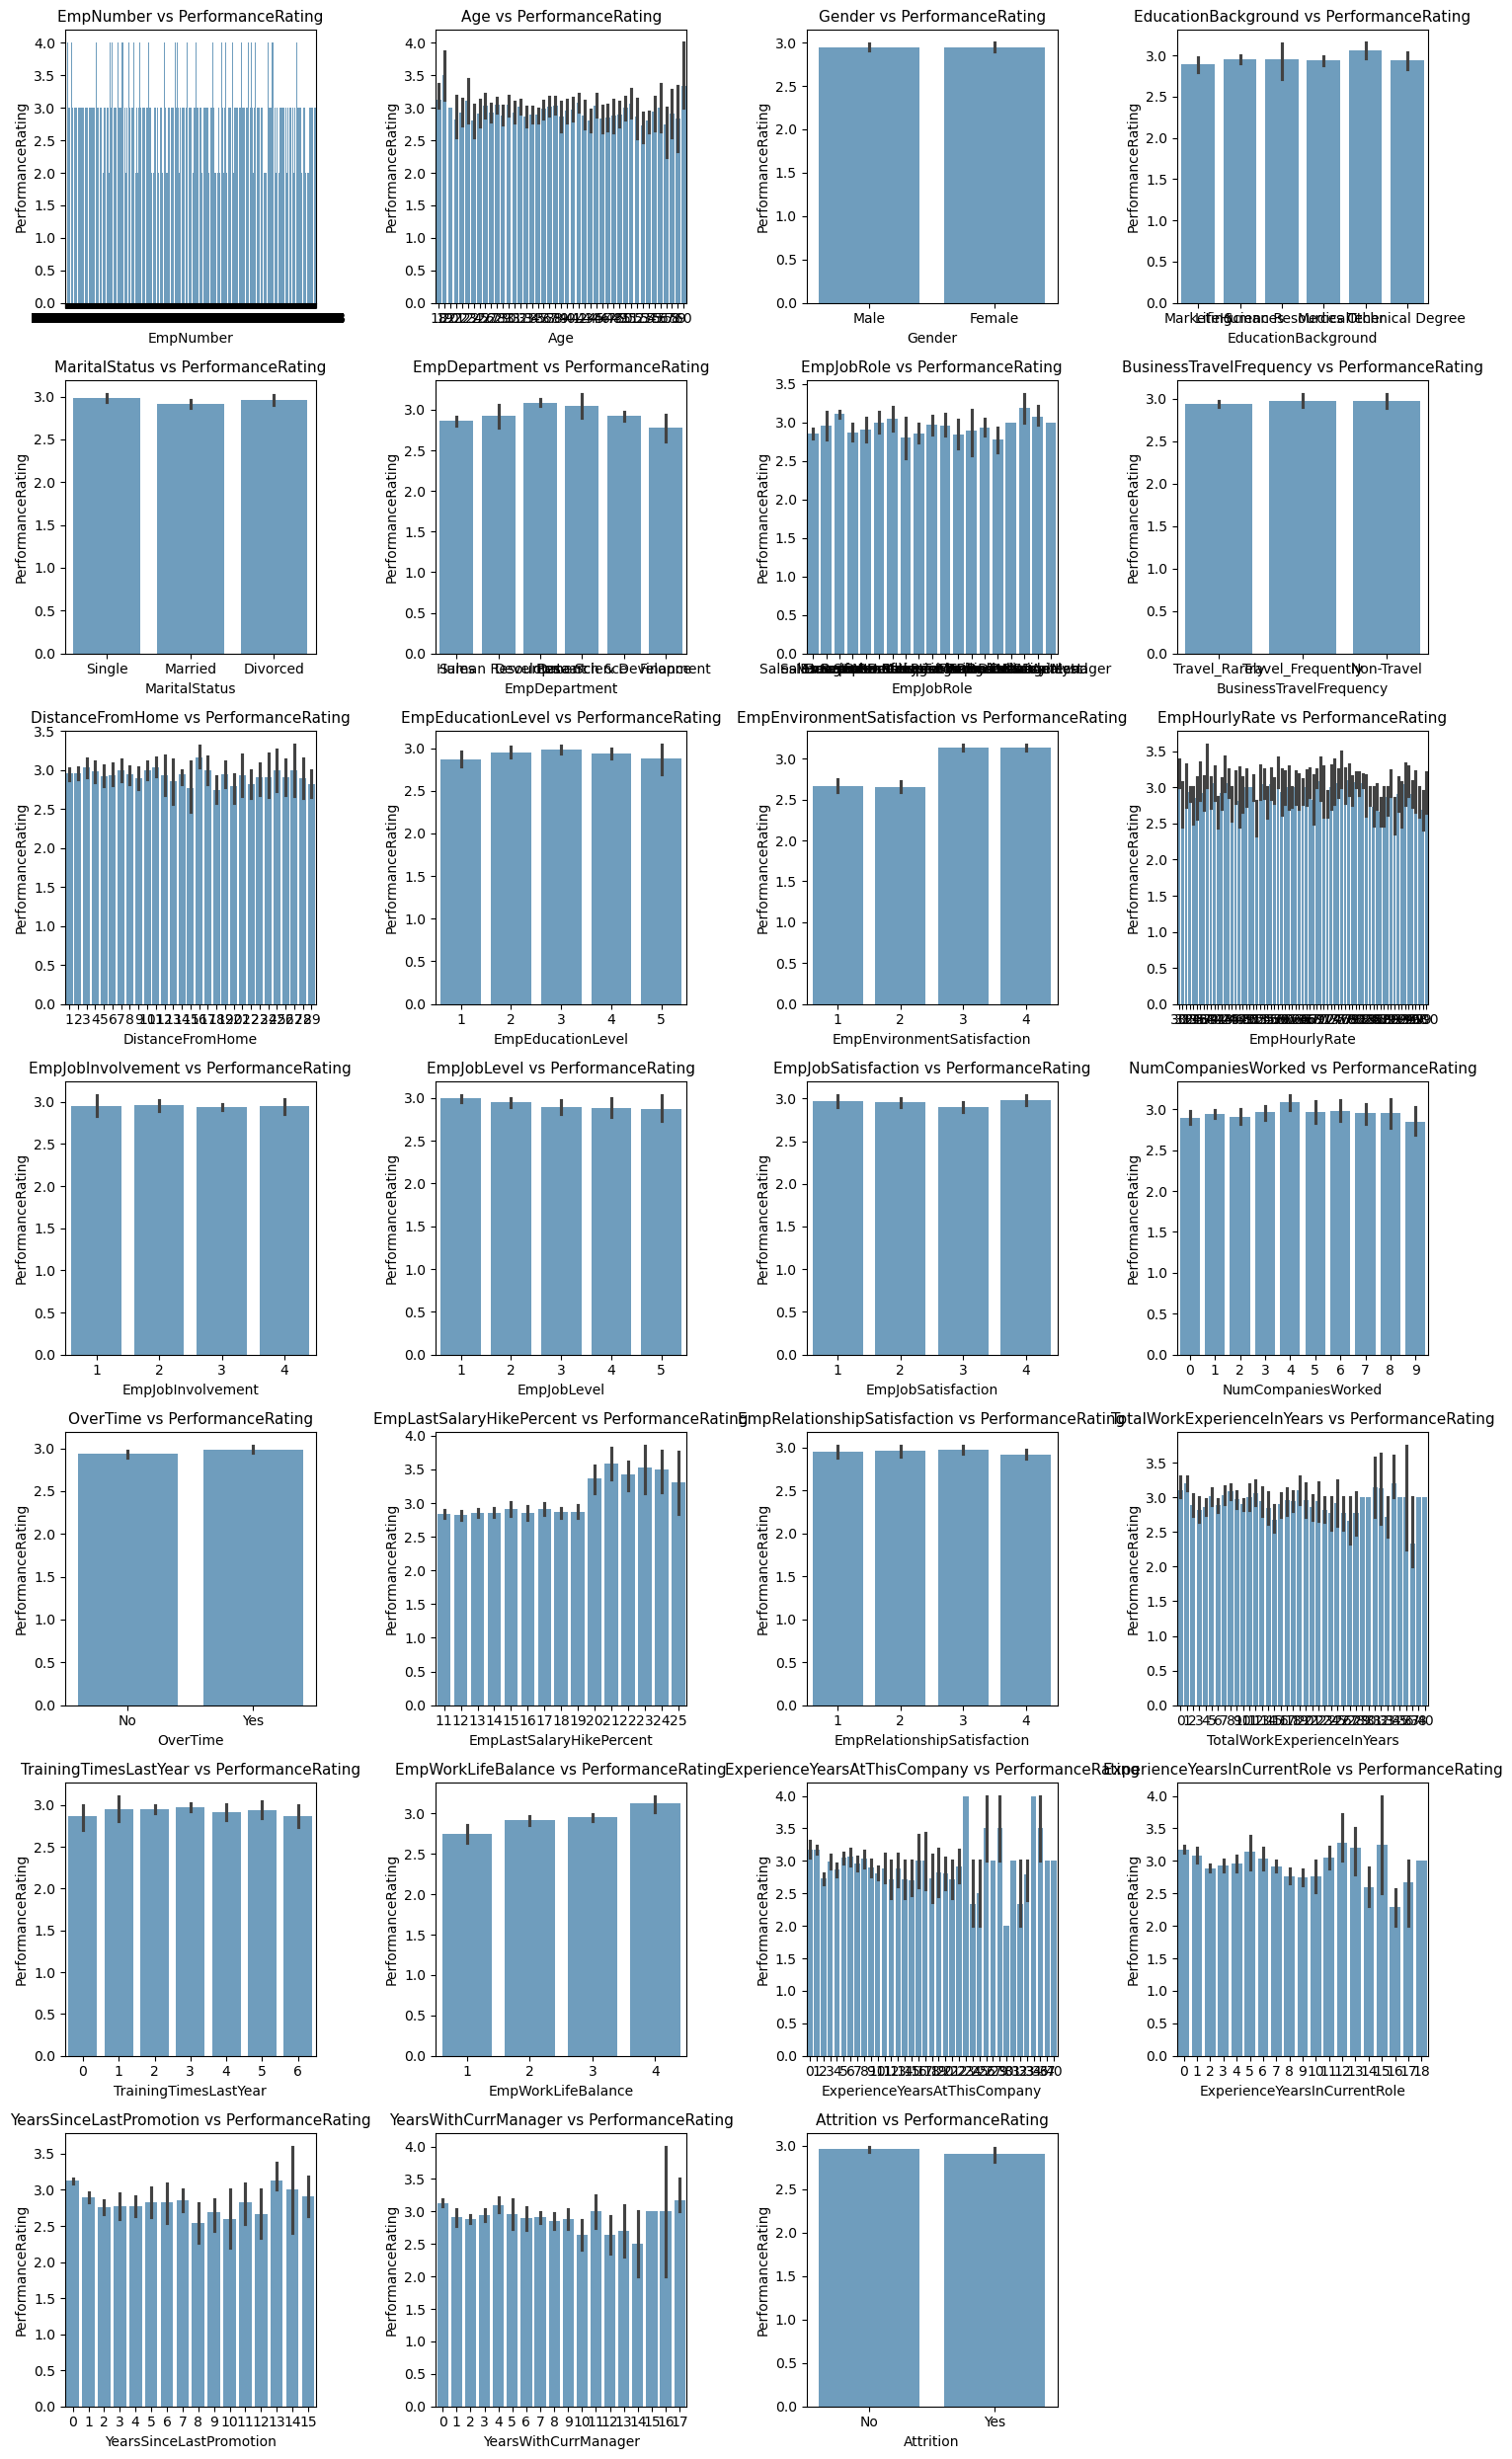

In [11]:
# Specify the target variable as a string
target_variable = 'PerformanceRating'  # Use the name of the target variable as a string
features_x = data.drop(columns=[target_variable])  # Drop the target variable

# Get the list of features excluding the target variable
features = features_x.columns.tolist()  # List of feature names

plt.figure(figsize=(15, 25))  # Increase height for better visibility

# Set the number of features and determine the layout
num_features = len(features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.barplot(data=data, x=feature, y=target_variable, alpha=0.7)#, color='blue'
    plt.title(f'{feature} vs {target_variable}', fontsize=11)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(target_variable, fontsize=10)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show() # f show the graphs

### Key Insights from the Performance Rating Analysis 📊
* **Employee Number vs Performance Rating:**

  * The performance ratings appear randomly distributed across employee numbers.
  * This suggests that no specific bias exists in assigning performance ratings based on employee ID.
* **Age vs Performance Rating:**

  * Performance ratings seem to increase slightly with age, but the difference is minimal.
  * Younger employees have a wider variation in ratings, whereas older employees seem to receive more consistent ratings.
* **Gender vs Performance Rating:**

  * Both males and females have almost identical performance ratings.
  * No noticeable gender bias is present in performance evaluations.
* **Education Background vs Performance Rating:**
  * Employees with different educational backgrounds have similar average performance ratings.
  * However, technical degree holders seem to have slightly higher ratings than others.
* **Marital Status vs Performance Rating:**

  * Employees who are single, married, or divorced all have nearly the same performance rating distribution.
  * No significant impact of marital status on performance evaluation.
* **Department vs Performance Rating:**

  * Ratings are consistent across different departments, with slight variations.
  * Employees in R&D and Sales seem to have higher ratings on average compared to other departments.
* **Job Role vs Performance Rating:**

  * The ratings seem evenly spread across different job roles.
  * Some roles may have slightly more variation, but no strong trend is visible.
* **Business Travel Frequency vs Performance Rating:**

  * Employees who travel rarely, frequently, or not at all have similar ratings.
  * This suggests that business travel does not significantly impact performance evaluations.
* **Distance from Home vs Performance Rating:**

  * No clear trend is visible. Employees living closer or farther from the workplace have similar ratings.
  * This suggests commuting distance does not impact performance evaluation significantly.
* **Education Level vs Performance Rating:**

  * Employees with higher education levels (Levels 4 and 5) tend to have slightly better performance ratings.
  * However, the difference is minimal, indicating that education level alone does not drive performance.
* **Environment Satisfaction vs Performance Rating:**

  * Employees with higher environment satisfaction scores (Levels 3 and 4) tend to have higher performance ratings.
  * This suggests that a positive work environment contributes to better performance.
* **Hourly Rate vs Performance Rating:**

  * No noticeable correlation between hourly pay and performance rating.
  * Higher earnings do not guarantee better performance, and vice versa.
* **Job Involvement vs Performance Rating:**

  * Employees with higher job involvement (Level 4) have slightly better ratings.
  * However, the differences are small, suggesting that job involvement is not the strongest predictor of performance.
* **Job Level vs Performance Rating:**

  * Employees at higher job levels (3, 4, and 5) have slightly better ratings.
  * This could indicate that experience and seniority contribute to performance evaluations.
* **Job Satisfaction vs Performance Rating:**

  * Employees with higher job satisfaction levels generally have better performance ratings.
  * This suggests that happier employees tend to perform better.
* **Number of Companies Worked vs Performance Rating:**

  * Employees who have worked in multiple companies (3-5 companies) tend to have higher ratings.
  * However, those with very high job switches (8-9 companies) seem to have slightly lower ratings, possibly due to lack of stability.
* **Overtime vs Performance Rating:**

  * Employees who work overtime tend to have slightly higher performance ratings.
  * This could suggest that dedication and extra effort lead to better evaluations.
* **Last Salary Hike Percent vs Performance Rating:**

  * Employees with higher salary hikes (above 20%) tend to have better performance ratings.
  * This suggests that companies may be rewarding high-performing employees with better raises.
* **Relationship Satisfaction vs Performance Rating**

  * Employees with better workplace relationships (higher satisfaction) tend to have higher performance ratings.
  * Positive relationships may contribute to a productive work environment.
* **Total Work Experience vs Performance Rating:**

  * No clear trend—performance ratings remain fairly stable regardless of total experience.
  * Years of experience alone may not predict performance, but rather skills and adaptability matter.
* **Training Times Last Year vs Performance Rating:**

  * Employees who attended more training sessions (4-5 times) show slightly better performance ratings.
  * Training might enhance skills, leading to better evaluations.
* **Work-Life Balance vs Performance Rating:**

  * Employees with a good work-life balance (Level 3 & 4) have better performance ratings.
  * This suggests that overworking may not always result in better performance—a balanced approach is ideal.
* **Experience at This Company vs Performance Rating:**

  * Performance ratings fluctuate across experience levels, with no clear trend.
  * Staying longer at a company does not necessarily guarantee higher performance ratings.
* **Experience in Current Role vs Performance Rating:**

  * Employees with 10+ years in the same role have more varied performance ratings.
  * This may indicate that stagnation in the same role can impact performance—new challenges may be necessary.
* **Years Since Last Promotion vs Performance Rating:**

  * Employees who were recently promoted (0-1 years) tend to have higher performance ratings.
  * Performance ratings remain stable over time, but after 10+ years without promotion, ratings show more variability.
  * This suggests that long periods without promotions may affect employee motivation and performance.
* **Years With Current Manager vs Performance Rating:**

  * Employees who have been with the same manager for a long time (10+ years) show more variability in performance ratings.
  * A good manager-employee relationship may contribute to higher performance, but staying too long under one manager may lead to stagnation.
  * It may be beneficial to rotate teams or provide leadership development opportunities.
* **Attrition vs Performance Rating**

  * Employees who left the company (Attrition = Yes) had slightly lower performance ratings on average.
  * However, the difference is not drastic, suggesting that performance is not the only reason for attrition—other factors like job satisfaction, career growth, and work-life balance may play a role.

### **Multivariante Analysis**

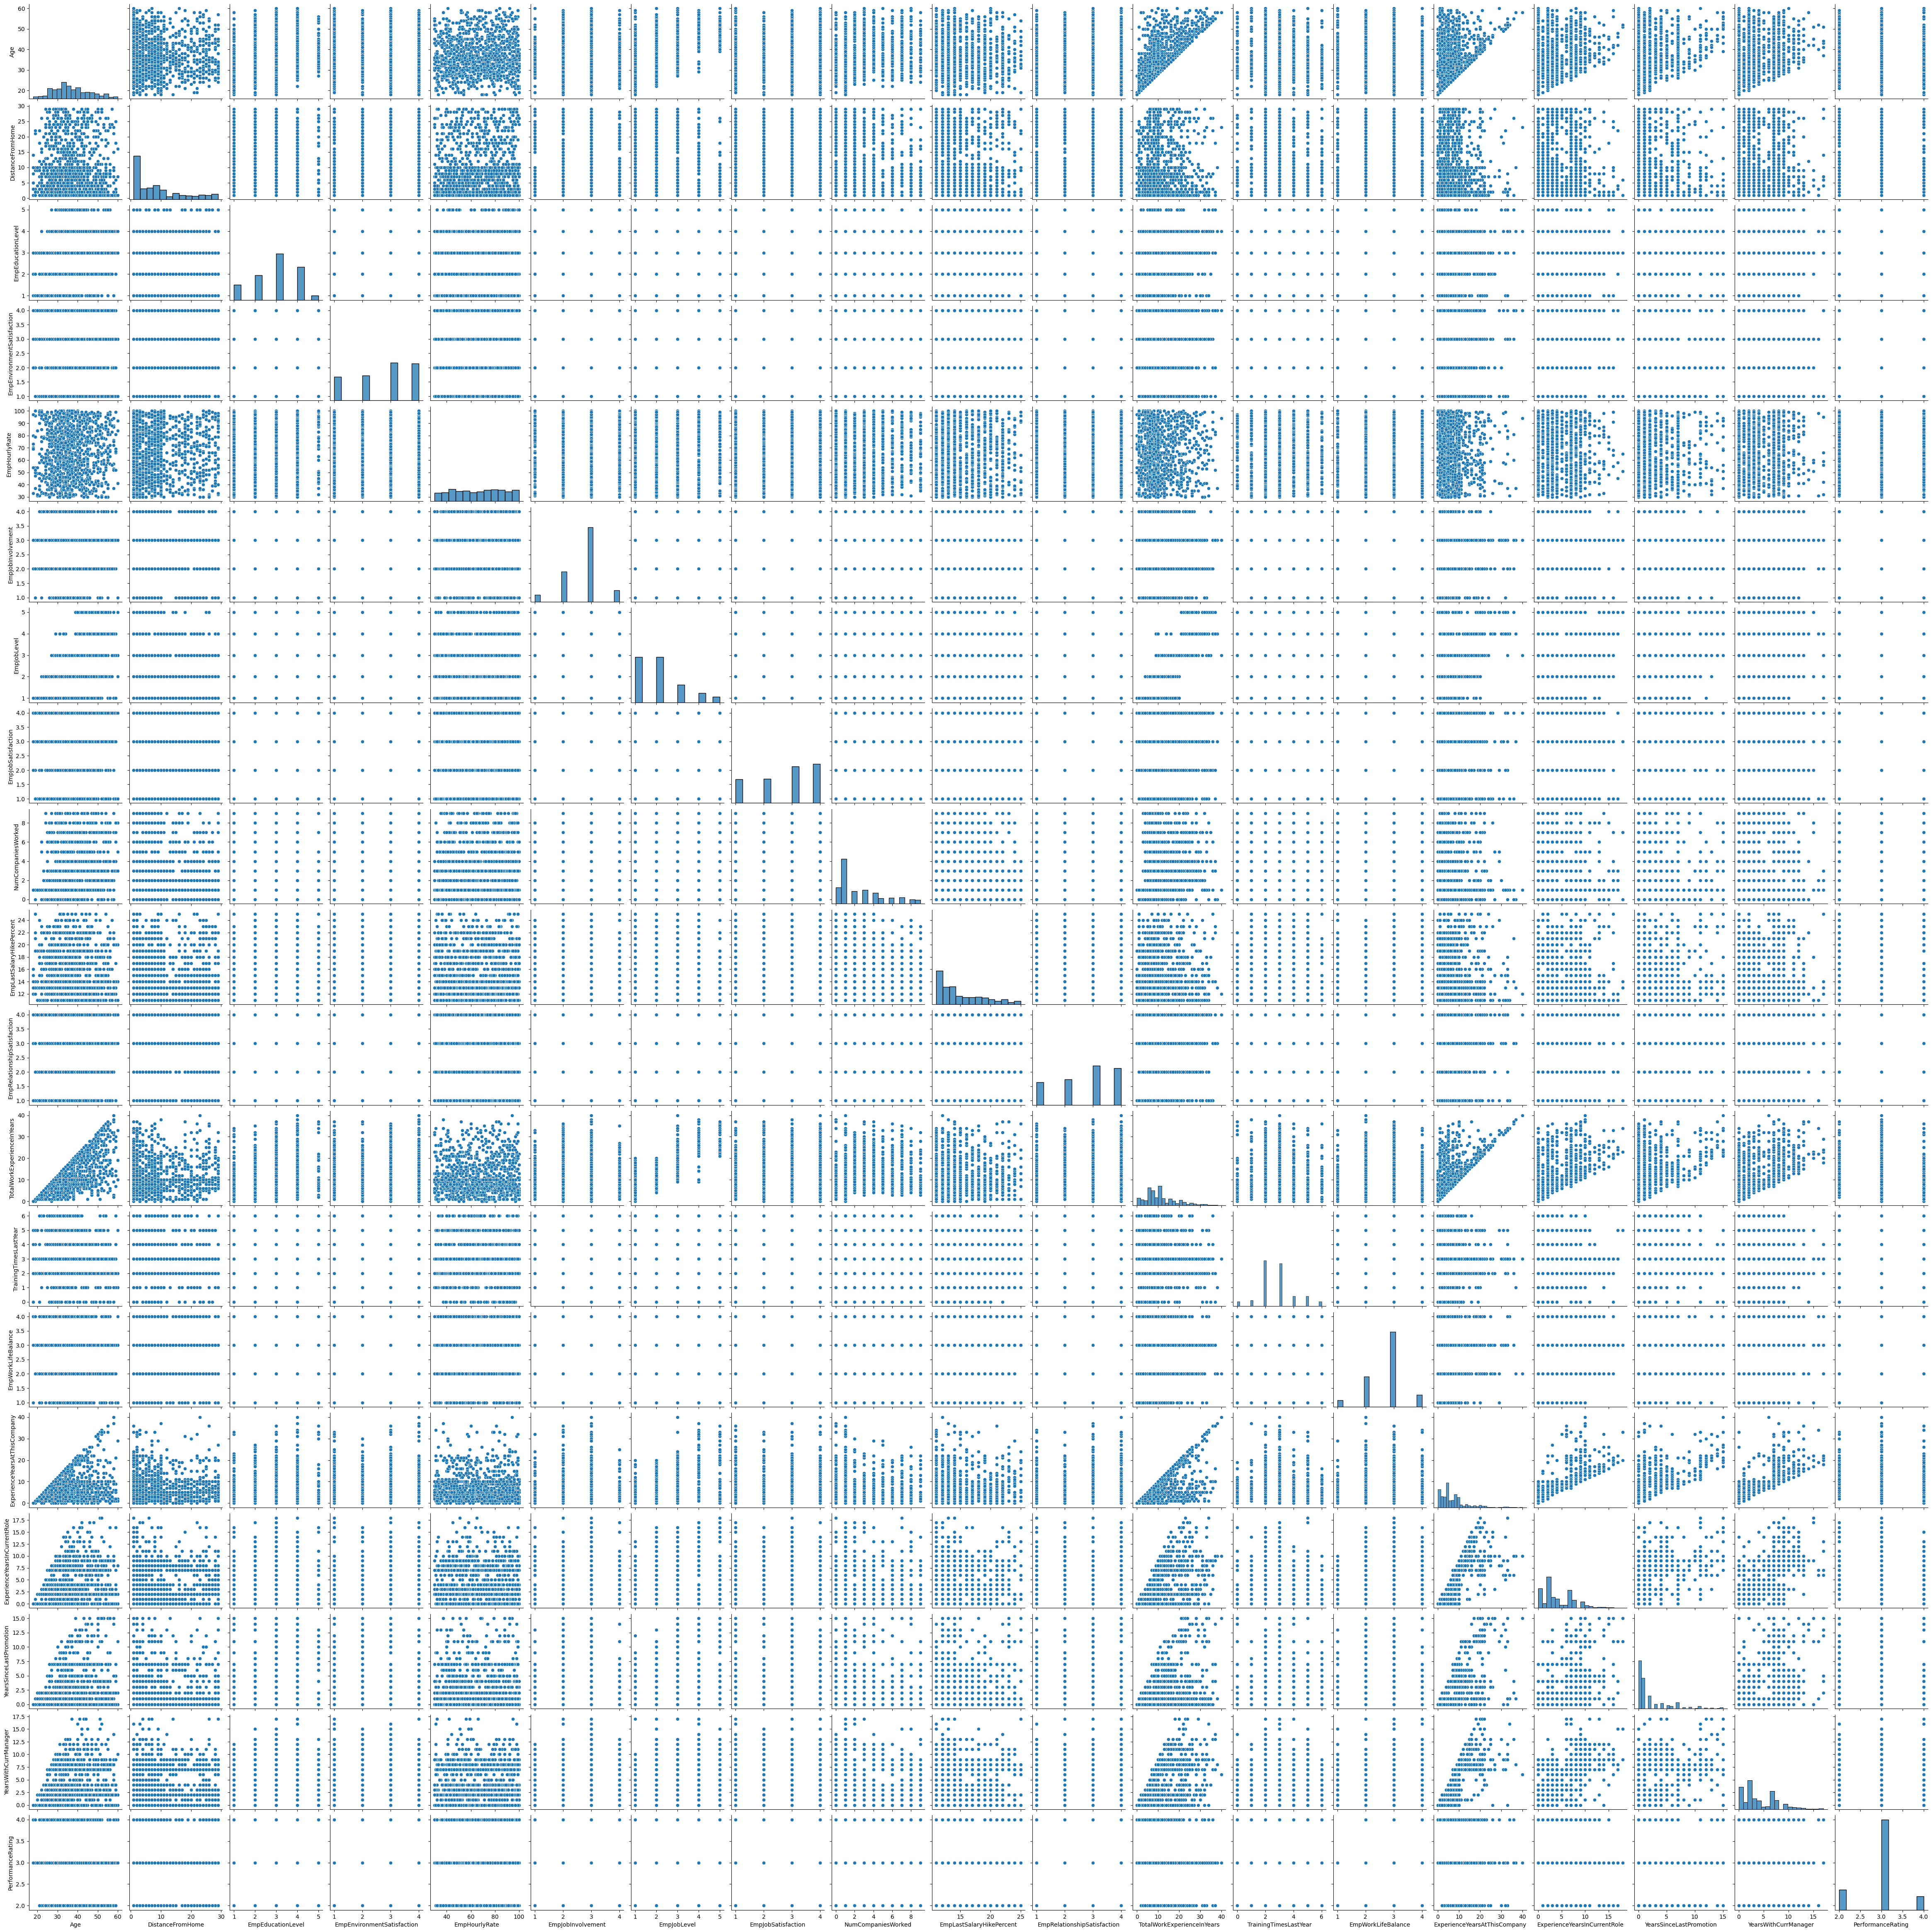

In [12]:
sns.pairplot(data) # Multivarient Analysis

### Final EDA Report
* **DistanceFromHome & EmpHourlyRate** – No significant impact on Performance Rating.
* **Education Level & Job Level** – Higher levels show slightly better ratings.
* **Environment & Job Satisfaction** – Higher satisfaction leads to better ratings.
* **Overtime & Work-Life Balance** – Employees with overtime have slightly higher ratings.
* **Salary Hike & Promotions** – Higher hikes and recent promotions correlate with better ratings.
* **Experience & Tenure** – Mixed impact, but longer experience doesn’t always mean higher ratings.
* **Attrition** – Employees who left had slightly lower ratings than those who stayed.

## Feature Engineering

* **Objective:** Enhance the dataset with meaningful features that improve model accuracy.
* **Actions:**
  * Normalize or standardize features to ensure comparability.

### Data Preprocessing

* **Objective:** Prepare the data for modeling.
* **Actions:**
  * Split the dataset into training and testing sets (80/20 split).
  * Address class imbalance using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling.

#### **Data Cleaning**

In [13]:
data.isnull().sum() # Identify missing values or inconsistencies.

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

#### **Insights**
  * There are no null values in column

**Let's find the unique values in every columns**

In [14]:
# We create a function to find the unique values in every column of a pandas DataFrame
def find_unique_values(df):
    """Finds the unique values in each column of a pandas DataFrame.

    Args:
        df: The pandas DataFrame to analyze.

    Returns:
        A dictionary where the keys are the column names and the values are lists of unique values.
    """

    # Initialize an empty dictionary to store unique values for each column
    unique_values = {}

    # Loop through each column in the DataFrame
    for column in df.columns:
        # Get the unique values from the column, convert them to a list, and store in the dictionary
        unique_values[column] = df[column].unique().tolist()

    # Return the dictionary containing unique values for all columns
    return unique_values

In [15]:
find_unique_values(data) # give the dataframe to funtion for find unique values in each column

{'EmpNumber': ['E1001000',
  'E1001006',
  'E1001007',
  'E1001009',
  'E1001010',
  'E1001011',
  'E1001016',
  'E1001019',
  'E1001020',
  'E1001021',
  'E1001022',
  'E1001024',
  'E1001025',
  'E1001027',
  'E1001030',
  'E1001035',
  'E1001038',
  'E1001040',
  'E1001041',
  'E1001042',
  'E1001044',
  'E1001047',
  'E1001049',
  'E1001050',
  'E1001053',
  'E1001054',
  'E1001058',
  'E1001059',
  'E1001061',
  'E1001062',
  'E1001063',
  'E1001064',
  'E1001067',
  'E1001069',
  'E1001070',
  'E1001071',
  'E1001074',
  'E1001075',
  'E1001077',
  'E1001078',
  'E1001080',
  'E1001081',
  'E1001082',
  'E1001083',
  'E1001085',
  'E1001086',
  'E1001090',
  'E1001091',
  'E1001093',
  'E1001094',
  'E1001095',
  'E1001097',
  'E1001098',
  'E1001101',
  'E1001102',
  'E1001104',
  'E1001105',
  'E1001106',
  'E1001107',
  'E1001110',
  'E1001111',
  'E1001112',
  'E1001114',
  'E1001115',
  'E1001118',
  'E1001120',
  'E1001121',
  'E1001122',
  'E1001123',
  'E1001124',
  'E100

### Insights
*  Here we can see all unique values of all columns

#### **see the outliers in all features**

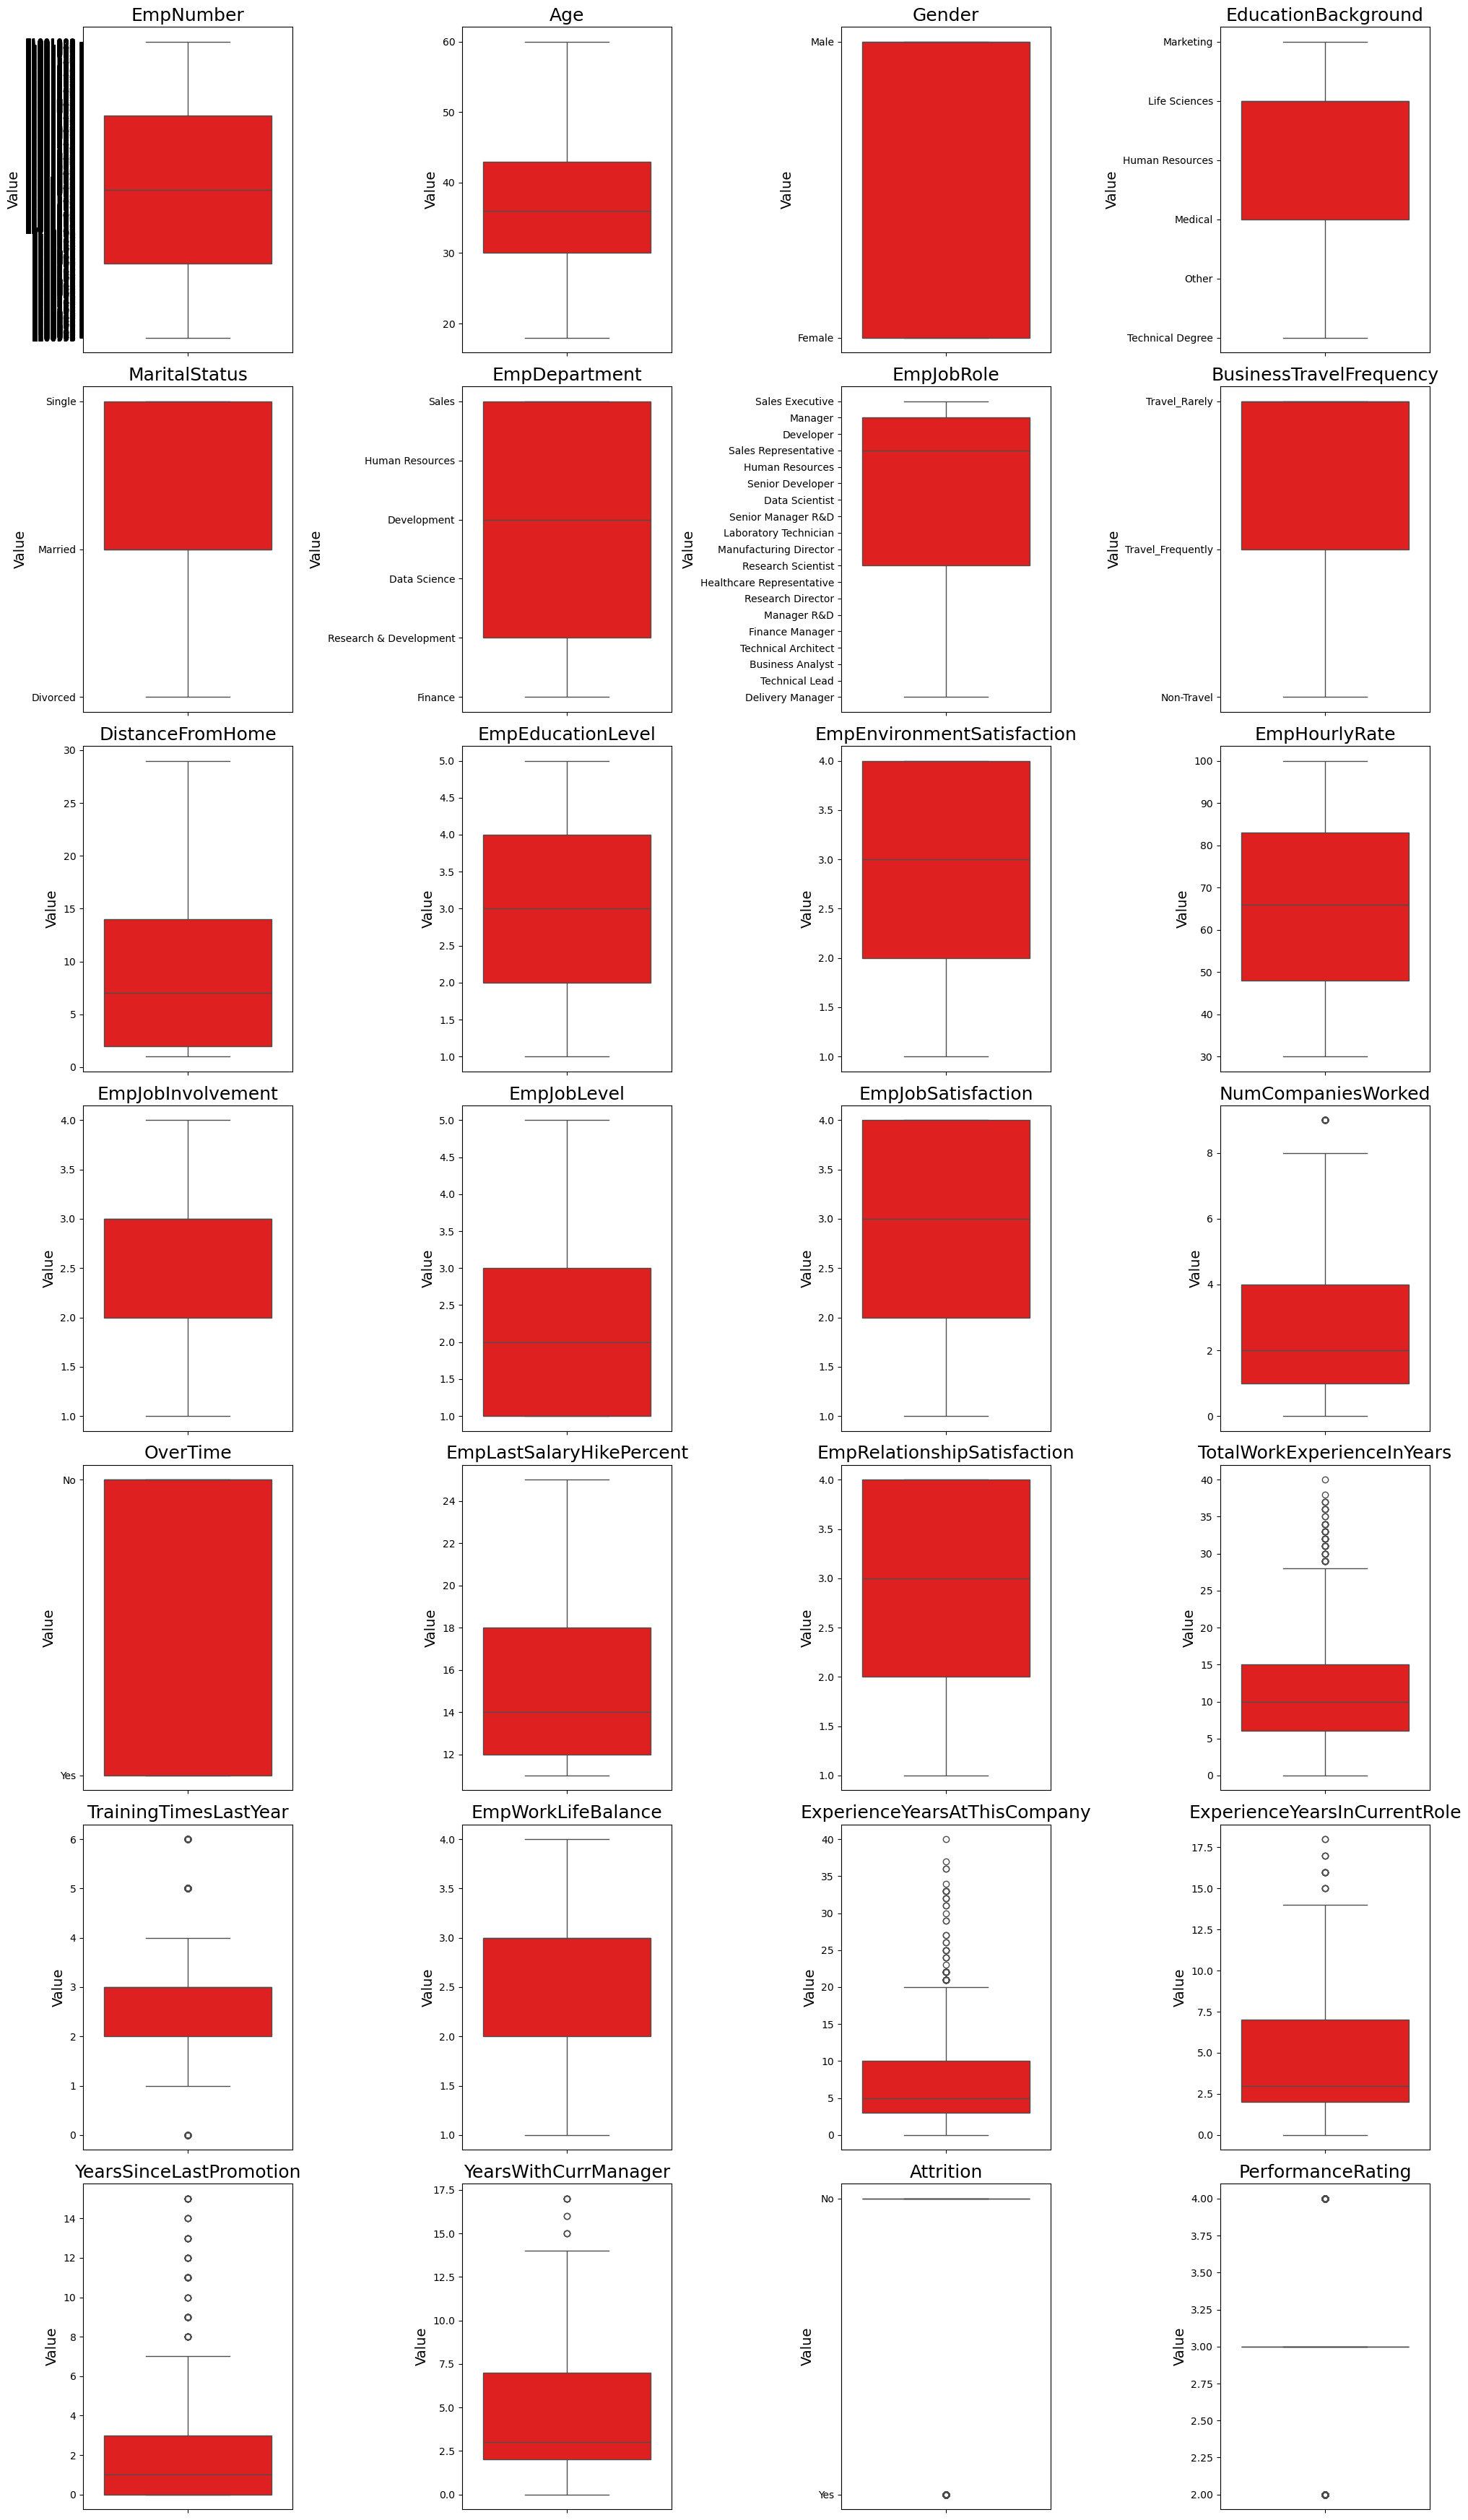

In [16]:
plt.figure(figsize=(20, 35))  # Adjust the figure size as needed

# Set the number of features and determine the layout
num_features = len(data.columns)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.boxplot(y=data[feature], color='red')  # Use 'y' parameter for vertical box plots
    plt.title(feature, fontsize=18)
    plt.ylabel('Value', fontsize=14)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show() # show the graph

### Insights
* Here we can see below features has outliers so we go do further processes

* **NumCompaniesWorked**
* **TotalWorkExperienceInYears**
* **TrainingTimesLastYear**
* **ExperienceYearsAtThisCompany**
* **ExperienceYearsInCurrentRole**
* **YearsSinceLastPromotion**
* **YearsWithCurrManager**
* **Attrition**
* **PerformanceRating**

#### Here we handle the ourliers of all column with mode because the all columns has discrete values.

**NumCompaniesWorked**

In [17]:
# Correctly handle outliers in the 'NumCompaniesWorked' column
data.loc[(data['NumCompaniesWorked'] > 8) , "NumCompaniesWorked"] = 1

**TotalWorkExperienceInYears**

In [18]:
# Correctly handle outliers in the 'TotalWorkExperienceInYears' column
data.loc[(data['TotalWorkExperienceInYears'] > 38) , "TotalWorkExperienceInYears"]= 10

**TrainingTimesLastYear**

In [19]:
# Correctly handle outliers in the 'TrainingTimesLastYear' column
data.loc[(data['TrainingTimesLastYear'] > 4) | (data['TrainingTimesLastYear'] < 1), "TrainingTimesLastYear"] = 2

**ExperienceYearsInCurrentRole**

In [20]:
# Correctly handle outliers in the 'ExperienceYearsInCurrentRole' column
data.loc[(data['ExperienceYearsInCurrentRole'] > 13 ), "ExperienceYearsInCurrentRole"] = data['ExperienceYearsInCurrentRole'].median()

**YearsSinceLastPromotion**

In [21]:
# Correctly handle outliers in the 'YearsSinceLastPromotion'])' column
data.loc[(data['YearsSinceLastPromotion'] >  7), "YearsSinceLastPromotion"] = 0

**YearsWithCurrManager**

In [22]:
# Correctly handle outliers in the 'YearsWithCurrManager' column
data.loc[(data['YearsWithCurrManager'] >= 14), "YearsWithCurrManager"] = 2

## Data Transformation:
* Encode categorical variables to numerical.

* __Label encoding columns:__ EmpNumber
* __One-Hot Encoding columns:__ Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, OverTime, Attrition

In [23]:
 # creating a list for encoding
LBE_columns = data.EmpNumber
OHE_columns = data[["Gender", "EducationBackground", "MaritalStatus", "EmpDepartment", "EmpJobRole", "BusinessTravelFrequency",
                    "OverTime", "Attrition"]]

__Apply Label Encoding__

In [24]:
from sklearn.preprocessing import LabelEncoder # Import Library for encoding

In [25]:
# Label Encoding
label_encoder = LabelEncoder() # save the Label Encoder
encoded_LBE_col = label_encoder.fit_transform(LBE_columns) # Transform the categorical columns into numerical columns

In [26]:
encoded_LBE_col = pd.DataFrame(encoded_LBE_col,columns=["EmpNumber"])

__Apply One-Hot Encoding__

In [27]:
# Creating separate column for all below columns as per their unique values
encoded_OHE_col = pd.get_dummies(OHE_columns,
                                 columns= ["Gender", "EducationBackground", "MaritalStatus", "EmpDepartment", "EmpJobRole", "BusinessTravelFrequency",
                                           "OverTime", "Attrition"],
                                 dtype=int)

### Now we remove the duplicate features from the data

In [28]:
data_clean = data.drop(["EmpNumber", "Gender", "EducationBackground", "MaritalStatus", "EmpDepartment", "EmpJobRole", "BusinessTravelFrequency",
                        "OverTime", "Attrition"], axis=1)

### Now we concatenate the encoded fertures

In [29]:
new_data = pd.concat([encoded_LBE_col,encoded_OHE_col,data_clean], axis=1)

## Feature Selection
* **Identify Important Features:**
  * Use correlation analysis and feature importance metrics .

In [30]:
new_data.corr() # Check the correlation of all features

EmpNumber  Gender_Female  Gender_Male  \
EmpNumber                             1.000000      -0.025922     0.025922   
Gender_Female                        -0.025922       1.000000    -1.000000   
Gender_Male                           0.025922      -1.000000     1.000000   
EducationBackground_Human Resources  -0.016869      -0.017057     0.017057   
EducationBackground_Life Sciences    -0.027772      -0.009528     0.009528   
...                                        ...            ...          ...   
ExperienceYearsAtThisCompany         -0.005061       0.030392    -0.030392   
ExperienceYearsInCurrentRole          0.000605       0.013002    -0.013002   
YearsSinceLastPromotion              -0.039726       0.025760    -0.025760   
YearsWithCurrManager                  0.021290       0.045034    -0.045034   
PerformanceRating                    -0.003163       0.001780    -0.001780   

                                     EducationBackground_Human Resources  \
EmpNumber                                                      -0.016869   
Gender_Female                                                  -0.017057   
Gender_Male                                                     0.017057   
EducationBackground_Human Resources                             1.000000   
EducationBackground_Life Sciences                              -0.111255   
...                                                                  ...   
ExperienceYearsAtThisCompany                                   -0.003698   
ExperienceYearsInCurrentRole                                   -0.014846   
YearsSinceLastPromotion                                        -0.025721   
YearsWithCurrManager                                           -0.011553   
PerformanceRating                                               0.001042   

                                     EducationBackground_Life Sciences  \
EmpNumber                                                    -0.027772   
Gender_Female                                                -0.009528   
Gender_Male                                                   0.009528   
EducationBackground_Human Resources                          -0.111255   
EducationBackground_Life Sciences                             1.000000   
...                                                                ...   
ExperienceYearsAtThisCompany                                 -0.017429   
ExperienceYearsInCurrentRole                                 -0.018921   
YearsSinceLastPromotion                                      -0.014692   
YearsWithCurrManager                                         -0.007372   
PerformanceRating                                             0.014439   

                                     EducationBackground_Marketing  \
EmpNumber                                                 0.021192   
Gender_Female                                             0.025564   
Gender_Male                                              -0.025564   
EducationBackground_Human Resources                      -0.047912   
EducationBackground_Life Sciences                        -0.299268   
...                                                            ...   
ExperienceYearsAtThisCompany                              0.038831   
ExperienceYearsInCurrentRole                              0.039700   
YearsSinceLastPromotion                                   0.026217   
YearsWithCurrManager                                      0.023101   
PerformanceRating                                        -0.040024   

                                     EducationBackground_Medical  \
EmpNumber                                               0.021541   
Gender_Female                                           0.025571   
Gender_Male                                            -0.025571   
EducationBackground_Human Resources                    -0.091553   
EducationBackground_Life Sciences                      -0.571856   
...                                              

<Axes: >

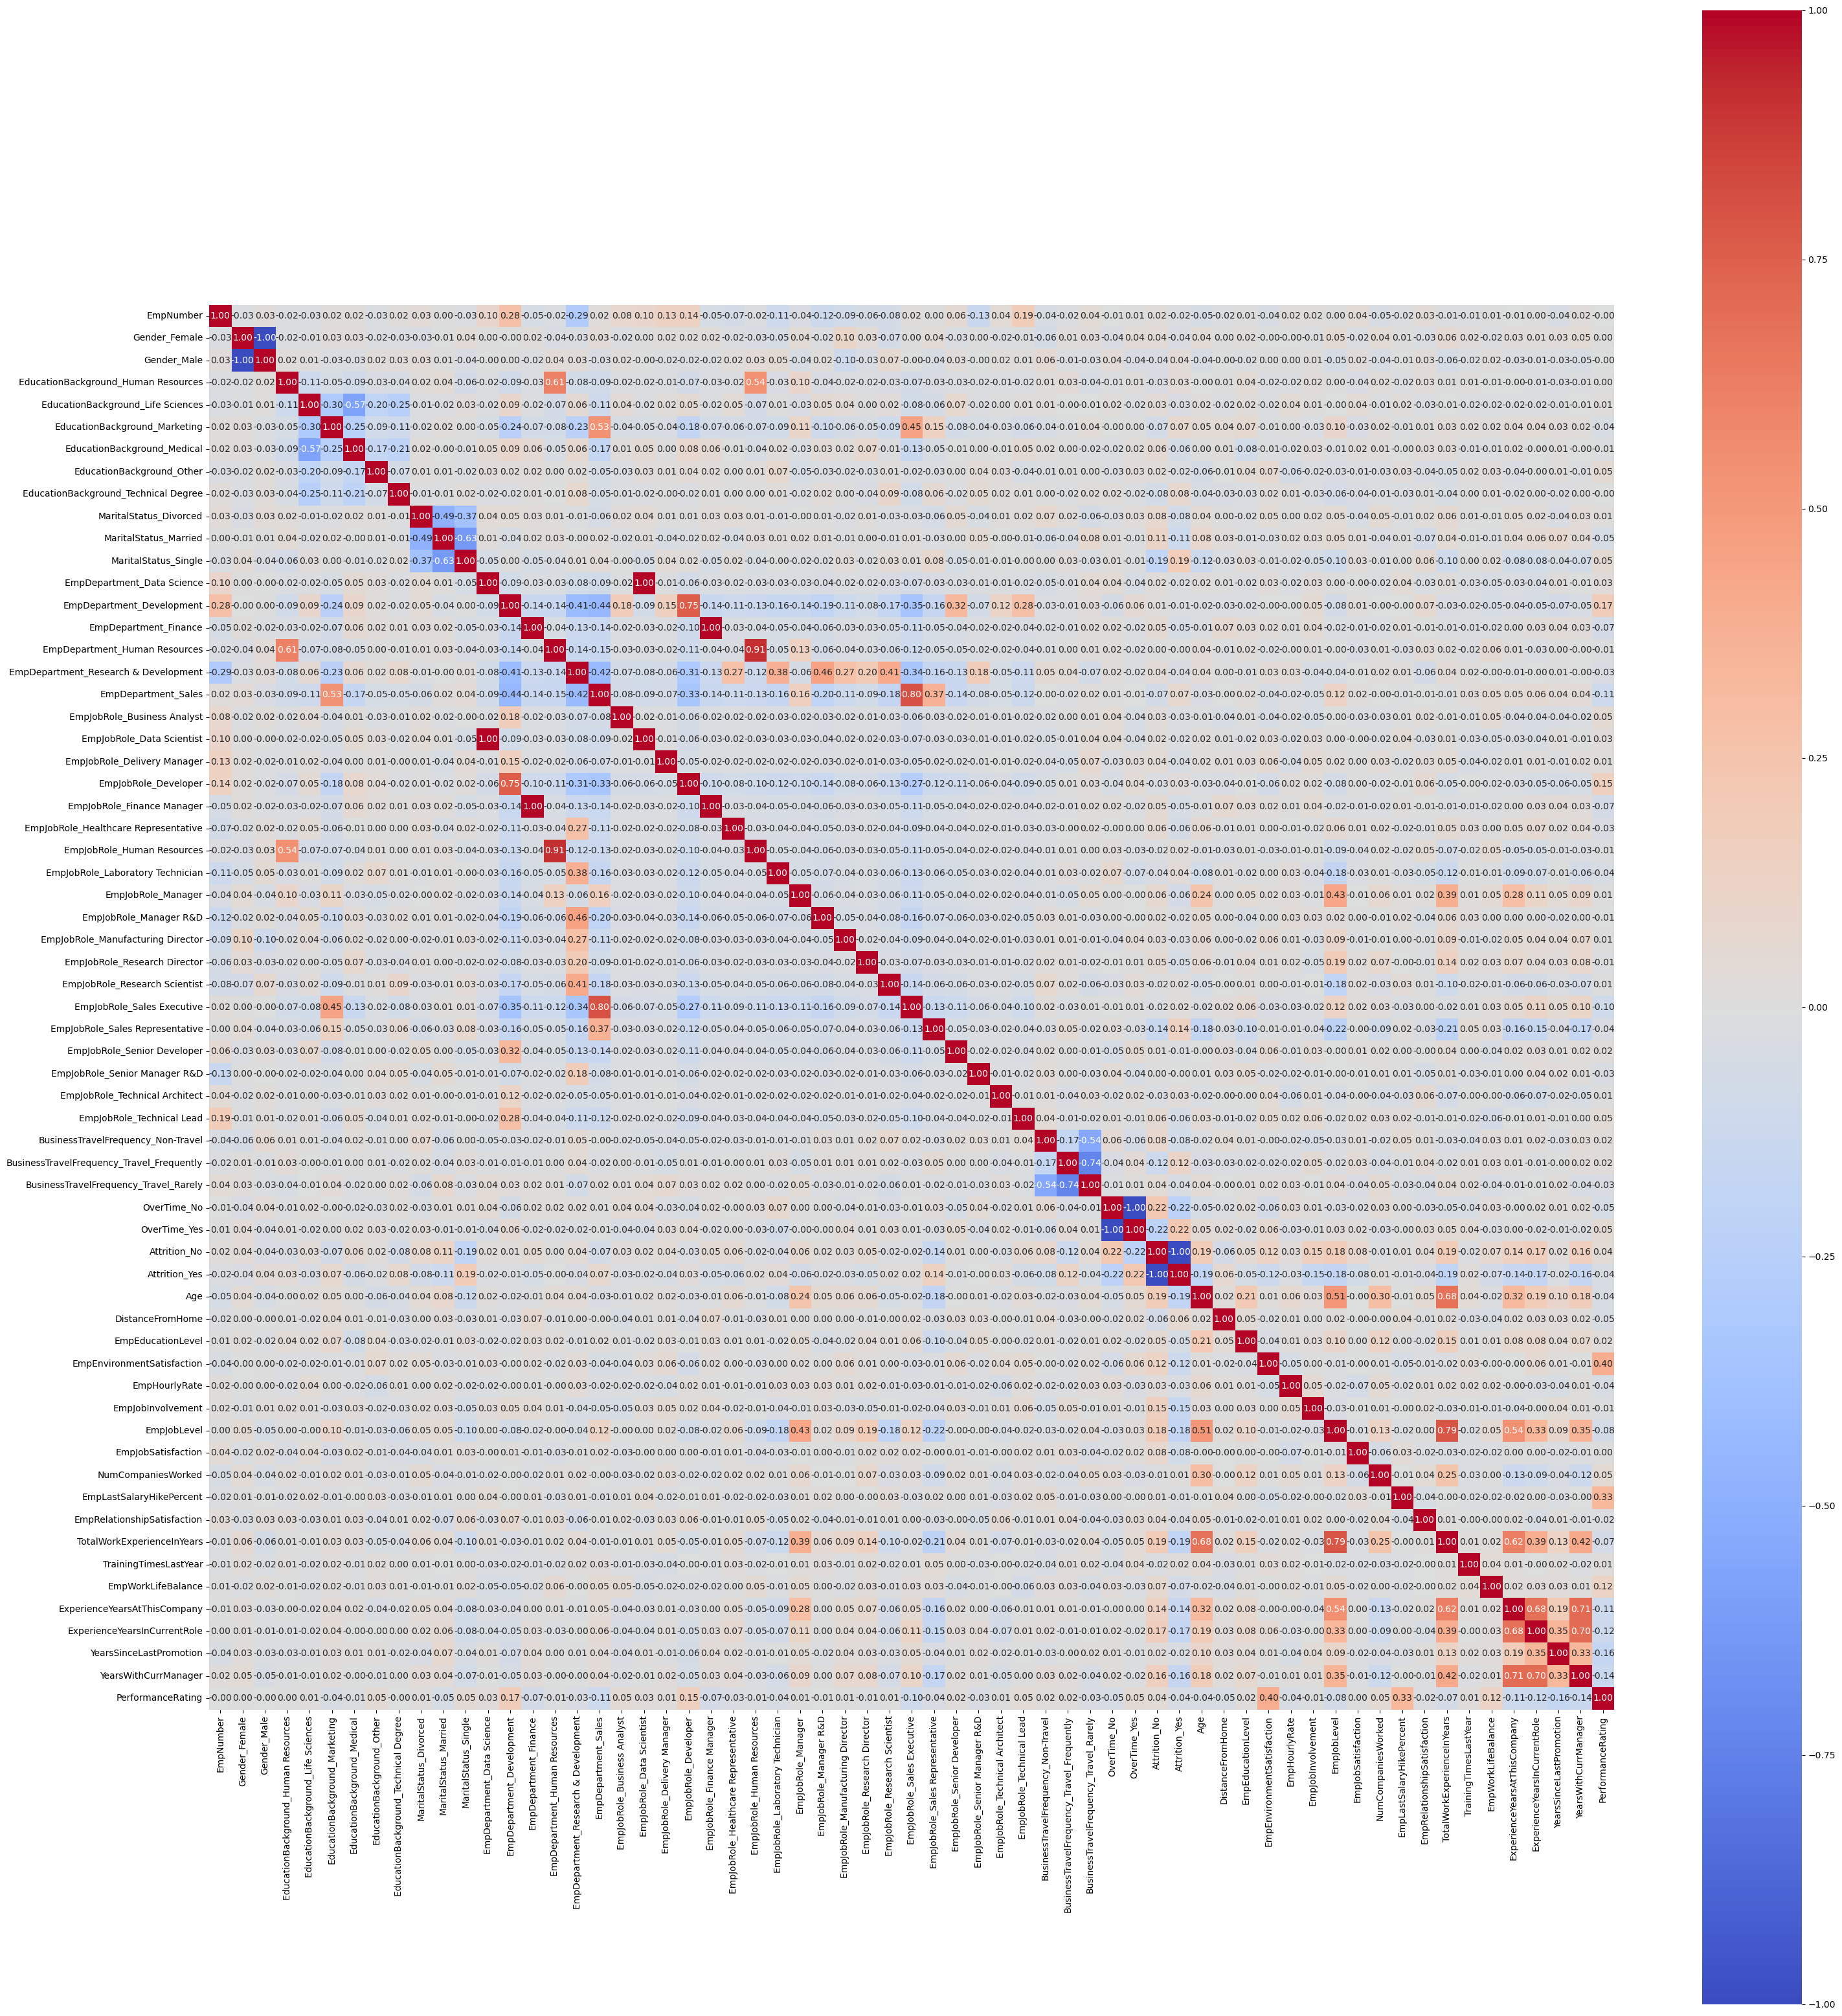

In [31]:
# Here is heatmap of correlation of all features
plt.figure(figsize=(35, 40))  # Set the figure size
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True) # ploting the heat map for checking correlation

### Insights

**Features to Remove (High Correlation with Others)**
* Gender_Female & Gender_Male – One is redundant if we already have the other.
* Attrition_No & Attrition_Yes – Keep only one.
* EducationBackground Categories – If correlations are weak, they may not be useful.
* JobRole Categories – High correlation among job roles suggests redundancy.
* EmpDepartment Categories – Consider removing if weakly correlated with target.

**Features to Keep (Relevant or Low Correlation)**
* PerformanceRating – Key target variable.
* EmpEnvironmentSatisfaction – May influence attrition/performance.
* YearsSinceLastPromotion – Affects employee satisfaction and retention.
* TotalWorkExperienceInYears – Important for salary hikes and promotions.
* EmpJobInvolvement & EmpSatisfaction – Strong workplace impact.

**Here we hard to identify which columns are impotant or not so we keep it all columns.**

## Model Selection

* **Objective:** Choose the most appropriate predictive models.
* **Actions:**
  * Test various algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines).
  * Evaluate models based on metrics.

In [32]:
new_data["PerformanceRating"].value_counts() # see the target variable

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

### Scaling
* Now we apply the scaling.

In [33]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # importing Scaler for transform the data in the certain range

In [34]:
scaler = MinMaxScaler() # save the StandardScaler

In [35]:
# We applying scaling

In [36]:
scaled_data = scaler.fit_transform(new_data.drop(["PerformanceRating"],axis=1)) # Apply Standard Scaler Scaling

In [37]:
scaled_df = pd.DataFrame(scaled_data, columns= new_data.drop(["PerformanceRating"],axis=1).columns) # Convert back to a DataFrame

### Now we define the Training and testing data

In [38]:
X = scaled_df.drop(["EmpNumber", "EducationBackground_Human Resources", "EducationBackground_Life Sciences", "EducationBackground_Marketing",
"EducationBackground_Medical","EducationBackground_Other","EducationBackground_Technical Degree","EmpDepartment_Data Science",
"EmpDepartment_Development","EmpDepartment_Finance","EmpDepartment_Human Resources","EmpDepartment_Research & Development",
"EmpJobRole_Business Analyst","EmpJobRole_Data Scientist","EmpJobRole_Delivery Manager","EmpJobRole_Developer","EmpJobRole_Finance Manager",
"EmpJobRole_Healthcare Representative","EmpJobRole_Human Resources","EmpJobRole_Laboratory Technician","EmpJobRole_Manager",
"EmpJobRole_Manager R&D","EmpJobRole_Manufacturing Director" ,"EmpJobRole_Research Director","EmpJobRole_Research Scientist",
"EmpJobRole_Sales Executive", "EmpJobRole_Sales Representative","EmpJobRole_Senior Developer", "EmpJobRole_Senior Manager R&D",
"EmpJobRole_Technical Architect", "EmpJobRole_Technical Lead"],axis=1) # define the X
y = new_data["PerformanceRating"] # define the y

### Now we handle the imbalanced target variable

In [39]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE()

# Apply SMOTE to balance dataset
X_resampled,y_resampled = smote.fit_resample(X, y)

In [40]:
# Check new class distribution
from collections import Counter
print("New Class Distribution:", Counter(y_resampled))

New Class Distribution: Counter({3: 874, 4: 874, 2: 874})


## Modeling
* **Train-Test Split:**
  * Split the dataset into training and testing sets (80/20 split).

In [41]:
# importing train_test_split for spliting the data into training and testing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # Importing for Hyperparameter tuning

In [42]:
# Here we split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.25, random_state=3)

In [43]:
num_classes = len(np.unique(y_train))  # Get the number of unique classes

# Ensure labels start from 0
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

print("Updated Class Labels:", np.unique(y_train))  # Check if labels start from 0

Updated Class Labels: [0 1 2]


## Model Creation and Model Evaluation

### Model Training and Tuning

* **Objective:** Optimize model performance, and Assess the final model's performance on unseen data.
* **Actions:**
  * Use cross-validation to validate model performance.
  * Fine-tune hyperparameters using techniques such as Grid Search or Random Search.
  * Evaluate the model using the train and test dataset.

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # importing the metrics of classfication

### **Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression # importing the Logistic regression Algorithm

In [46]:
LR_model = LogisticRegression() # save the model

In [47]:
LR_model.fit(X_train,y_train) # Train the model

LogisticRegression()

In [48]:
LR_train_predict = LR_model.predict(X_train) # Prediction for training
LR_test_predict = LR_model.predict(X_test) # Prediction for testing

In [49]:
LR_training_accuracy = accuracy_score(y_train,LR_train_predict) # accuracy for training
LR_testing_accuracy = accuracy_score(y_test,LR_test_predict) # accuracy for testing

In [50]:
print("Training accuracy",LR_training_accuracy) # See the Training accuracy
print("Testing accuracy",LR_testing_accuracy)# See the Testing accuracy

Training accuracy 0.8128179043743642
Testing accuracy 0.801829268292683


In [51]:
print(classification_report(y_train,LR_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       653
           1       0.79      0.69      0.74       659
           2       0.88      0.91      0.89       654

    accuracy                           0.81      1966
   macro avg       0.81      0.81      0.81      1966
weighted avg       0.81      0.81      0.81      1966



In [52]:
print(classification_report(y_test,LR_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       221
           1       0.74      0.76      0.75       215
           2       0.83      0.88      0.85       220

    accuracy                           0.80       656
   macro avg       0.80      0.80      0.80       656
weighted avg       0.80      0.80      0.80       656



#### **Hyperparameter tuning for Logistic Regression**

In [53]:
# Define the hyperparameter grid
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],      # Optimization algorithm
    'penalty': ['l2', 'none'],             # Regularization type
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(LR_model, param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_LR.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_LR.best_params_)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [54]:
# Best model
LR_HPT_model = grid_search_LR.best_estimator_

In [55]:
LR_HPT_train_predict = LR_HPT_model.predict(X_train)  # Prediction for training
LR_HPT_test_predict = LR_HPT_model.predict(X_test)  # Prediction for testing

In [56]:
# Calculate accuracy for training and testing
LR_HPT_training_accuracy = accuracy_score(y_train, LR_HPT_train_predict)  # Accuracy for training
LR_HPT_testing_accuracy = accuracy_score(y_test, LR_HPT_test_predict)  # Accuracy for testing

In [57]:
print("Training Accuracy:", LR_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", LR_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.8189216683621566
Testing Accuracy: 0.8170731707317073


In [58]:
print(classification_report(y_train, LR_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       653
           1       0.83      0.68      0.75       659
           2       0.87      0.92      0.89       654

    accuracy                           0.82      1966
   macro avg       0.82      0.82      0.82      1966
weighted avg       0.82      0.82      0.82      1966



In [59]:
print(classification_report(y_test, LR_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       221
           1       0.79      0.75      0.77       215
           2       0.83      0.90      0.87       220

    accuracy                           0.82       656
   macro avg       0.82      0.82      0.82       656
weighted avg       0.82      0.82      0.82       656



### **Support Vector Machine (SVM)**

In [60]:
from sklearn.svm import SVC # Importing the SVM Algorithm

In [61]:
SVM_model = SVC() #kernel="rbf",gamma="auto",C=1 # save the model

In [62]:
SVM_model.fit(X_train,y_train) # Train the model

SVC()

In [63]:
SVM_train_predict = SVM_model.predict(X_train) # Prediction for training
SVM_test_predict = SVM_model.predict(X_test) # Prediction for testing

In [64]:
SVM_training_accuracy = accuracy_score(y_train,SVM_train_predict) # accuracy for training
SVM_testing_accuracy = accuracy_score(y_test,SVM_test_predict) # accuracy for testing

In [65]:
print("Training Accuracy:", SVM_training_accuracy) # See the training accuracy
print("Testing Accuracy:", SVM_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.9415055951169888
Testing Accuracy: 0.9146341463414634


In [66]:
print(classification_report(y_train,SVM_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       653
           1       0.97      0.86      0.91       659
           2       0.96      0.99      0.98       654

    accuracy                           0.94      1966
   macro avg       0.94      0.94      0.94      1966
weighted avg       0.94      0.94      0.94      1966



In [67]:
print(classification_report(y_test,SVM_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       221
           1       0.93      0.80      0.86       215
           2       0.92      0.98      0.95       220

    accuracy                           0.91       656
   macro avg       0.92      0.91      0.91       656
weighted avg       0.92      0.91      0.91       656



#### **Hyperparameter tuning For SVM**

In [68]:
# Define the parameter grid for hyperparameter tuning
param_grid_SVM = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(
    SVM_model,
    param_grid_SVM,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_SVM.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_SVM.best_params_)
print("Best Score:", grid_search_SVM.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9257488278374085


In [69]:
# Make predictions with the best estimator
SVM_HPT_model = grid_search_SVM.best_estimator_

In [70]:
SVM_HPT_train_predict = SVM_HPT_model.predict(X_train)  # Prediction for training
SVM_HPT_test_predict = SVM_HPT_model.predict(X_test)  # Prediction for testing

In [71]:
# Calculate accuracy for training and testing
SVM_HPT_training_accuracy = accuracy_score(y_train, SVM_HPT_train_predict)  # Accuracy for training
SVM_HPT_testing_accuracy = accuracy_score(y_test, SVM_HPT_test_predict)  # Accuracy for testing

In [72]:
print("Training Accuracy:", SVM_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", SVM_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.9954221770091557
Testing Accuracy: 0.9466463414634146


In [73]:
print(classification_report(y_train, SVM_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       653
           1       1.00      0.99      0.99       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [74]:
print(classification_report(y_test, SVM_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       221
           1       0.96      0.87      0.91       215
           2       0.94      0.99      0.96       220

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



### **Decision Tree**

In [75]:
from sklearn.tree import DecisionTreeClassifier # importing the Decision Tree Algorithm

In [76]:
DT_model = DecisionTreeClassifier(class_weight='balanced') # save the model

In [77]:
DT_model.fit(X_train,y_train) # Train the model

DecisionTreeClassifier(class_weight='balanced')

In [78]:
DT_train_predict = DT_model.predict(X_train) # Prediction for training
DT_test_predict = DT_model.predict(X_test) # Prediction for testing

In [79]:
DT_training_accuracy = accuracy_score(y_train,DT_train_predict) # accuracy for training
DT_testing_accuracy = accuracy_score(y_test,DT_test_predict) # accuracy for testing

In [80]:
print("Training Accuracy:", DT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", DT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9298780487804879


In [81]:
print(classification_report(y_train,DT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [82]:
print(classification_report(y_test,DT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       221
           1       0.90      0.90      0.90       215
           2       0.95      0.96      0.96       220

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



#### **Hyperparameter tuning For Decision Tree**

In [83]:
# Define the hyperparameter grid
param_grid_DT = {
    'criterion': ['gini', 'entropy'],          # Split quality measure
    'max_depth': [None, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],         # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
}

# Create the GridSearchCV object
grid_search_DT = GridSearchCV(DT_model, param_grid_DT, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_DT.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_DT.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [84]:
# Best model
DT_HPT_model = grid_search_DT.best_estimator_

In [85]:
DT_HPT_train_predict = DT_HPT_model.predict(X_train)  # Prediction for training
DT_HPT_test_predict = DT_HPT_model.predict(X_test)  # Prediction for testing

In [86]:
# Calculate accuracy for training and testing
DT_HPT_training_accuracy = accuracy_score(y_train, DT_HPT_train_predict)  # Accuracy for training
DT_HPT_testing_accuracy = accuracy_score(y_test, DT_HPT_test_predict)  # Accuracy for testing

In [87]:
print("Training Accuracy:", DT_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", DT_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.8689024390243902


In [88]:
print(classification_report(y_train, DT_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [89]:
print(classification_report(y_test, DT_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       221
           1       0.82      0.85      0.83       215
           2       0.91      0.87      0.89       220

    accuracy                           0.87       656
   macro avg       0.87      0.87      0.87       656
weighted avg       0.87      0.87      0.87       656



### **Random Forest**

In [90]:
from sklearn.ensemble import RandomForestClassifier # importing the Random Forest Algorithm

In [91]:
RF_model = RandomForestClassifier(class_weight='balanced') # save the model

In [92]:
RF_model.fit(X_train,y_train) # Train the model

RandomForestClassifier(class_weight='balanced')

In [93]:
RF_train_predict = RF_model.predict(X_train) # Prediction for training
RF_test_predict = RF_model.predict(X_test) # Prediction for testing

In [94]:
RF_training_accuracy = accuracy_score(y_train,RF_train_predict) # accuracy for training
RF_testing_accuracy = accuracy_score(y_test,RF_test_predict) # accuracy for testing

In [95]:
print("Training Accuracy:", RF_training_accuracy) # See the training accuracy
print("Testing Accuracy:", RF_testing_accuracy) # See the Testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.961890243902439


In [96]:
print(classification_report(y_train,RF_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [97]:
print(classification_report(y_test,RF_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       221
           1       0.94      0.95      0.94       215
           2       0.99      0.98      0.98       220

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



#### **Hyperparameter tuning For Random Forest**

In [98]:
# Define the parameter grid for hyperparameter tuning
param_grid_RF = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search_RF = GridSearchCV(
    RF_model,
    param_grid_RF,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_RF.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_RF.best_params_)
print("Best Score:", grid_search_RF.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9501595174435877


In [99]:
# Make predictions with the best estimator
RF_HPT_model = grid_search_RF.best_estimator_

In [100]:
RF_HPT_train_predict = RF_HPT_model.predict(X_train)  # Prediction for training
RF_HPT_test_predict = RF_HPT_model.predict(X_test)  # Prediction for testing

In [101]:
# Calculate accuracy for training and testing
RF_HPT_training_accuracy = accuracy_score(y_train, RF_HPT_train_predict)  # Accuracy for training
RF_HPT_testing_accuracy = accuracy_score(y_test, RF_HPT_test_predict)  # Accuracy for testing

In [102]:
print("Training Accuracy:", RF_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", RF_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.961890243902439


In [103]:
print(classification_report(y_train, RF_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [104]:
print(classification_report(y_test, RF_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       221
           1       0.95      0.93      0.94       215
           2       0.98      0.99      0.98       220

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



### **K-Nearest Neighbors (KNN)**

In [105]:
from sklearn.neighbors import KNeighborsClassifier # importing the KKN Algorithm

In [106]:
KNN_model = KNeighborsClassifier() # save the model

In [107]:
KNN_model.fit(X_train,y_train) # Train the model

KNeighborsClassifier()

In [108]:
KNN_train_predict = KNN_model.predict(X_train) # Prediction for training
KNN_test_predict = KNN_model.predict(X_test) # Prediction for testing

In [109]:
KNN_training_accuracy = accuracy_score(y_train,KNN_train_predict) # accuracy for training
KNN_testing_accuracy = accuracy_score(y_test,KNN_test_predict) # accuracy for testing

In [110]:
print("Training Accuracy:", KNN_training_accuracy) # see the training accuracy
print("Testing Accuracy:", KNN_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.8484231943031536
Testing Accuracy: 0.823170731707317


In [111]:
print(classification_report(y_train,KNN_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       653
           1       0.98      0.57      0.72       659
           2       0.84      1.00      0.91       654

    accuracy                           0.85      1966
   macro avg       0.87      0.85      0.84      1966
weighted avg       0.87      0.85      0.84      1966



In [112]:
print(classification_report(y_test,KNN_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       221
           1       0.93      0.53      0.67       215
           2       0.83      0.98      0.90       220

    accuracy                           0.82       656
   macro avg       0.84      0.82      0.81       656
weighted avg       0.84      0.82      0.81       656



#### **Hyperparameter tuning of K-Nearest Neighbors (KNN)**

In [113]:
# Define the parameter grid for hyperparameter tuning
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Different values for n_neighbors
    'weights': ['uniform', 'distance'],  # Weighting functions
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create the GridSearchCV object
grid_search_KNN = GridSearchCV(
    KNN_model,
    param_grid_KNN,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_KNN.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_KNN.best_params_)
print("Best Score:", grid_search_KNN.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.8525051342658969


In [114]:
# Make predictions with the best estimator
KNN_HPT_model = grid_search_KNN.best_estimator_

In [115]:
KNN_HPT_train_predict = KNN_HPT_model.predict(X_train)  # Prediction for training
KNN_HPT_test_predict = KNN_HPT_model.predict(X_test)  # Prediction for testing

In [116]:
# Calculate accuracy for training and testing
KNN_HPT_training_accuracy = accuracy_score(y_train, KNN_HPT_train_predict)  # Accuracy for training
KNN_HPT_testing_accuracy = accuracy_score(y_test, KNN_HPT_test_predict)  # Accuracy for testing

In [117]:
print("Training Accuracy:", KNN_HPT_training_accuracy)
print("Testing Accuracy:", KNN_HPT_testing_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8948170731707317


In [118]:
print(classification_report(y_train, KNN_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [119]:
print(classification_report(y_test, KNN_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       221
           1       0.99      0.70      0.82       215
           2       0.88      0.99      0.93       220

    accuracy                           0.89       656
   macro avg       0.91      0.89      0.89       656
weighted avg       0.91      0.89      0.89       656



### **Naive Bayes**

In [120]:
from sklearn.naive_bayes import MultinomialNB # importing the naive bayes Algorithm

In [121]:
naive_bayes_model = MultinomialNB() # save the model

In [122]:
naive_bayes_model.fit(X_train,y_train) # Train the model

MultinomialNB()

In [123]:
naive_bayes_model_train_predict = naive_bayes_model.predict(X_train) # Prediction for training
naive_bayes_model_test_predict = naive_bayes_model.predict(X_test) # Prediction for testing

In [124]:
naive_bayes_training_accuracy = accuracy_score(y_train, naive_bayes_model_train_predict) # accuracy for training
naive_bayes_testing_accuracy = accuracy_score(y_test, naive_bayes_model_test_predict) # accuracy for testing

In [125]:
print("Training Accuracy:", naive_bayes_training_accuracy)
print("Testing Accuracy:", naive_bayes_testing_accuracy)

Training Accuracy: 0.7243133265513734
Testing Accuracy: 0.7103658536585366


In [126]:
print(classification_report(y_train, naive_bayes_model_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       653
           1       0.67      0.57      0.62       659
           2       0.76      0.82      0.79       654

    accuracy                           0.72      1966
   macro avg       0.72      0.72      0.72      1966
weighted avg       0.72      0.72      0.72      1966



In [127]:
print(classification_report(y_test, naive_bayes_model_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       221
           1       0.63      0.61      0.62       215
           2       0.74      0.78      0.76       220

    accuracy                           0.71       656
   macro avg       0.71      0.71      0.71       656
weighted avg       0.71      0.71      0.71       656



#### **Hyperparameter Tuning of Naive Bayes**

In [128]:
# Define the parameter grid for MultinomialNB
param_grid_naive_bayes = {
    'alpha': np.logspace(-3, 1, num=50)  # Tuning alpha (Laplace smoothing)
}

# Create the GridSearchCV object
naive_bayes_grid_search = GridSearchCV(
    naive_bayes_model,
    param_grid_naive_bayes,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
naive_bayes_grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", naive_bayes_grid_search.best_params_)
print("Best Score:", naive_bayes_grid_search.best_score_)

Best Parameters: {'alpha': 10.0}
Best Score: 0.7095852546466721


In [129]:
# Make predictions with the best estimator
naive_bayes_HPT_model = naive_bayes_grid_search.best_estimator_

In [130]:
naive_bayes_HPT_train_predict = naive_bayes_HPT_model.predict(X_train)  # Prediction for training
naive_bayes_HPT_test_predict = naive_bayes_HPT_model.predict(X_test)  # Prediction for testing

In [131]:
# Calculate accuracy for training and testing
naive_bayes_HPT_training_accuracy = accuracy_score(y_train, naive_bayes_HPT_train_predict)  # Accuracy for training
naive_bayes_HPT_testing_accuracy = accuracy_score(y_test, naive_bayes_HPT_test_predict)  # Accuracy for testing

In [132]:
print("Training Accuracy:", naive_bayes_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", naive_bayes_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.7278738555442523
Testing Accuracy: 0.7179878048780488


In [133]:
print(classification_report(y_train, naive_bayes_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       653
           1       0.68      0.57      0.62       659
           2       0.76      0.83      0.79       654

    accuracy                           0.73      1966
   macro avg       0.72      0.73      0.72      1966
weighted avg       0.72      0.73      0.72      1966



In [134]:
print(classification_report(y_test, naive_bayes_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       221
           1       0.64      0.60      0.62       215
           2       0.75      0.80      0.77       220

    accuracy                           0.72       656
   macro avg       0.72      0.72      0.72       656
weighted avg       0.72      0.72      0.72       656



### **Gradient Boosting**

In [135]:
from sklearn.ensemble import GradientBoostingClassifier # Importing Gradient Boosting Algorithm

In [136]:
GB_model = GradientBoostingClassifier() # save the model

In [137]:
GB_model.fit(X_train,y_train) # Train the model

GradientBoostingClassifier()

In [138]:
GB_train_predict = GB_model.predict(X_train) # Prediction for training
GB_test_predict = GB_model.predict(X_test) # Prediction for testing

In [139]:
GB_training_accuracy = accuracy_score(y_train,GB_train_predict) # accuracy for training
GB_testing_accuracy = accuracy_score(y_test,GB_test_predict) # accuracy for testing

In [140]:
print("Training Accuracy:", GB_training_accuracy) # see the training accuracy
print("Testing Accuracy:", GB_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9908443540183113
Testing Accuracy: 0.9557926829268293


In [141]:
print(classification_report(y_train,GB_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       653
           1       1.00      0.98      0.99       659
           2       1.00      1.00      1.00       654

    accuracy                           0.99      1966
   macro avg       0.99      0.99      0.99      1966
weighted avg       0.99      0.99      0.99      1966



In [142]:
print(classification_report(y_test,GB_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       221
           1       0.93      0.93      0.93       215
           2       0.99      0.98      0.98       220

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



#### **Hyperparameter Tuning for Gradient Boosting**

In [143]:
# Define the hyperparameter grid
param_grid_GB = {
    'n_estimators': [50, 100, 200],            # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage used in updates
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],             # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]                    # Fraction of samples to be used for fitting the individual base learners
}

# Create the GridSearchCV object
grid_search_GB = GridSearchCV(GB_model, param_grid_GB, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_GB.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_GB.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}


In [144]:
# Best model
GB_HPT_model = grid_search_GB.best_estimator_

In [145]:
GB_HPT_train_predict = GB_HPT_model.predict(X_train)  # Prediction for training
GB_HPT_test_predict = GB_HPT_model.predict(X_test)  # Prediction for testing

In [146]:
# Calculate accuracy for training and testing
GB_HPT_training_accuracy = accuracy_score(y_train, GB_HPT_train_predict)  # Accuracy for training
GB_HPT_testing_accuracy = accuracy_score(y_test, GB_HPT_test_predict)  # Accuracy for testing

In [147]:
print("Training Accuracy:", GB_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", GB_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9573170731707317


In [148]:
print(classification_report(y_train, GB_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [149]:
print(classification_report(y_test, GB_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       221
           1       0.93      0.95      0.94       215
           2       0.99      0.99      0.99       220

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



### **Ada Boosting**

In [150]:
from sklearn.ensemble import AdaBoostClassifier # Importing Ada Boosting Algorithm

In [151]:
AD_model = AdaBoostClassifier() # save the model

In [152]:
AD_model.fit(X_train,y_train) # Train the model

AdaBoostClassifier()

In [153]:
AD_train_predict = AD_model.predict(X_train) # Prediction for training
AD_test_predict = AD_model.predict(X_test) # Prediction for testing

In [154]:
AD_training_accuracy = accuracy_score(y_train,AD_train_predict) # accuracy for training
AD_testing_accuracy = accuracy_score(y_test,AD_test_predict) # accuracy for testing

In [155]:
print("Training Accuracy:", AD_training_accuracy) # see the training accuracy
print("Testing Accuracy:", AD_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.8397761953204476
Testing Accuracy: 0.8125


In [156]:
print(classification_report(y_train,AD_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       653
           1       0.83      0.65      0.73       659
           2       0.77      0.95      0.85       654

    accuracy                           0.84      1966
   macro avg       0.85      0.84      0.84      1966
weighted avg       0.85      0.84      0.84      1966



In [157]:
print(classification_report(y_test,AD_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       221
           1       0.75      0.65      0.70       215
           2       0.76      0.90      0.82       220

    accuracy                           0.81       656
   macro avg       0.82      0.81      0.81       656
weighted avg       0.82      0.81      0.81       656



#### **Hyperparameter Tuning for Ada Boosting**

In [158]:
# Define the hyperparameter grid
param_grid_AD = {
    'n_estimators': [50, 100, 200],            # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],         # Weight applied to each classifier
    'estimator': [None, DecisionTreeClassifier(max_depth=1)]  # Base estimator (None uses the default decision tree)
}

# Create the GridSearchCV object
grid_search_AD = GridSearchCV(AD_model, param_grid_AD, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_AD.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_AD.best_params_)

Best Hyperparameters: {'estimator': None, 'learning_rate': 0.1, 'n_estimators': 200}


In [159]:
# Best model
AD_HPT_model = grid_search_AD.best_estimator_

In [160]:
AD_HPT_train_predict = AD_HPT_model.predict(X_train)  # Prediction for training
AD_HPT_test_predict = AD_HPT_model.predict(X_test)  # Prediction for testing

In [161]:
# Calculate accuracy for training and testing
AD_HPT_training_accuracy = accuracy_score(y_train, AD_HPT_train_predict)  # Accuracy for training
AD_HPT_testing_accuracy = accuracy_score(y_test, AD_HPT_test_predict)  # Accuracy for testing

In [162]:
print("Training Accuracy:", AD_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", AD_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9104781281790437
Testing Accuracy: 0.9100609756097561


In [163]:
print(classification_report(y_train, AD_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       653
           1       0.87      0.87      0.87       659
           2       0.94      0.92      0.93       654

    accuracy                           0.91      1966
   macro avg       0.91      0.91      0.91      1966
weighted avg       0.91      0.91      0.91      1966



In [164]:
print(classification_report(y_test, AD_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       221
           1       0.85      0.90      0.87       215
           2       0.94      0.92      0.93       220

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



### **Xtreme Gradient Boosting**

In [165]:
from xgboost import XGBClassifier # Importing Xtreme Gradient Boosting Algorithm

In [166]:
XGB_model = XGBClassifier(class_weight='balanced') # save the model

In [167]:
XGB_model.fit(X_train, y_train)  # Fit with relabelled target

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [168]:
XGB_train_predict = XGB_model.predict(X_train) # Prediction for training
XGB_test_predict = XGB_model.predict(X_test) # Prediction for testing

In [169]:
XGB_training_accuracy = accuracy_score(y_train, XGB_train_predict) # accuracy for training
XGB_testing_accuracy = accuracy_score(y_test, XGB_test_predict) # accuracy for testing

In [170]:
print("Training Accuracy:", XGB_training_accuracy) # see the training accuracy
print("Testing Accuracy:", XGB_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9573170731707317


In [171]:
print(classification_report(y_train, XGB_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [172]:
print(classification_report(y_test, XGB_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       221
           1       0.93      0.93      0.93       215
           2       0.99      0.98      0.99       220

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



#### **Hyperparameter Tuning for Xtreme Gradient Boosting**

In [173]:
# Define the hyperparameter grid
param_grid_XGB = {
    'n_estimators': [50, 100, 200],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'max_depth': [3, 5, 7],                    # Maximum tree depth
    'min_child_weight': [1, 2, 3],             # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],                   # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 1.0],            # Fraction of features used for fitting the trees
}

# Create the GridSearchCV object
grid_search_XGB = GridSearchCV(XGB_model, param_grid_XGB, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_XGB.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_XGB.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}


In [174]:
# Best model
XGB_HPT_model = grid_search_XGB.best_estimator_

In [175]:
XGB_HPT_train_predict = XGB_HPT_model.predict(X_train)  # Prediction for training
XGB_HPT_test_predict = XGB_HPT_model.predict(X_test)  # Prediction for testing

In [176]:
# Calculate accuracy for training and testing
XGB_HPT_training_accuracy = accuracy_score(y_train, XGB_HPT_train_predict)  # Accuracy for training
XGB_HPT_testing_accuracy = accuracy_score(y_test, XGB_HPT_test_predict)  # Accuracy for testing

In [177]:
print("Training Accuracy:", XGB_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", XGB_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9969481180061037
Testing Accuracy: 0.961890243902439


In [178]:
print(classification_report(y_train, XGB_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       653
           1       1.00      0.99      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [179]:
print(classification_report(y_test, XGB_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       221
           1       0.94      0.94      0.94       215
           2       1.00      0.99      0.99       220

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



### **Bagging Algorithm**

In [180]:
from sklearn.ensemble import BaggingClassifier # importing Bagging Algorithm

In [181]:
BG_model = BaggingClassifier(estimator=XGBClassifier(), n_estimators=100) # save the model

In [182]:
BG_model.fit(X_train,y_train) # Train the model

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                  n_estimators=100)

In [183]:
BG_train_predict = BG_model.predict(X_train) # Prediction for training
BG_test_predict = BG_model.predict(X_test) # Prediction for testing

In [184]:
BG_training_accuracy = accuracy_score(y_train,BG_train_predict) # accuracy for training
BG_testing_accuracy = accuracy_score(y_test,BG_test_predict) # accuracy for testing

In [185]:
print("Training Accuracy:", BG_training_accuracy) # see the training accuracy
print("Testing Accuracy:", BG_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9542682926829268


In [186]:
print(classification_report(y_train,BG_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [187]:
print(classification_report(y_test,BG_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       221
           1       0.93      0.93      0.93       215
           2       0.98      0.98      0.98       220

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



#### **Hyperparameter Tuning for Bagging Algorithm**

In [188]:
# Define the hyperparameter grid
param_grid_BG = {
    'n_estimators': [50, 100, 200],              # Number of base estimators in the ensemble
    'estimator__n_estimators': [50, 100],         # Number of boosting rounds for XGBClassifier
    'estimator__learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage for XGBClassifier
    'estimator__max_depth': [3, 5, 7],            # Maximum tree depth for XGBClassifier
    'estimator__subsample': [0.8, 1.0],           # Fraction of samples used for fitting the base learners
}

# Create the GridSearchCV object
grid_search_BG = GridSearchCV(BG_model, param_grid_BG, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_BG.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_BG.best_params_)

Best Hyperparameters: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 3, 'estimator__n_estimators': 100, 'estimator__subsample': 0.8, 'n_estimators': 200}


In [189]:
# Best model
BG_HPT_model = grid_search_BG.best_estimator_

In [190]:
BG_HPT_train_predict = BG_HPT_model.predict(X_train)  # Prediction for training
BG_HPT_test_predict = BG_HPT_model.predict(X_test)  # Prediction for testing

In [191]:
# Calculate accuracy for training and testing
BG_HPT_training_accuracy = accuracy_score(y_train, BG_HPT_train_predict)  # Accuracy for training
BG_HPT_testing_accuracy = accuracy_score(y_test, BG_HPT_test_predict)  # Accuracy for testing

In [192]:
print("Training Accuracy:", BG_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", BG_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9933875890132248
Testing Accuracy: 0.9496951219512195


In [193]:
print(classification_report(y_train, BG_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       653
           1       1.00      0.98      0.99       659
           2       1.00      1.00      1.00       654

    accuracy                           0.99      1966
   macro avg       0.99      0.99      0.99      1966
weighted avg       0.99      0.99      0.99      1966



In [194]:
print(classification_report(y_test, BG_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       221
           1       0.93      0.92      0.92       215
           2       0.97      0.97      0.97       220

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



### **Artificial Neural Network (ANN)**

In [195]:
from sklearn.neural_network import MLPClassifier # importing Artificial Neural Network (ANN) algorithm

In [196]:
MLP_model = MLPClassifier() # save the model

In [197]:
MLP_model.fit(X_train,y_train) # Train the model

MLPClassifier()

In [198]:
MLP_train_predict = MLP_model.predict(X_train) # Prediction for training
MLP_test_predict = MLP_model.predict(X_test) # Prediction for testing

In [199]:
MLP_training_accuracy = accuracy_score(y_train,MLP_train_predict) # accuracy for training
MLP_testing_accuracy = accuracy_score(y_test,MLP_test_predict) # accuracy for testing

In [200]:
print("Training Accuracy:", MLP_training_accuracy) # see the training accuracy
print("Testing Accuracy:", MLP_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9730417090539166
Testing Accuracy: 0.9283536585365854


In [201]:
print(classification_report(y_train,MLP_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       653
           1       0.99      0.93      0.96       659
           2       0.97      0.99      0.98       654

    accuracy                           0.97      1966
   macro avg       0.97      0.97      0.97      1966
weighted avg       0.97      0.97      0.97      1966



In [202]:
print(classification_report(y_test,MLP_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       221
           1       0.93      0.85      0.89       215
           2       0.92      0.98      0.95       220

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



#### **Hyperparameter tuning for ANN**

In [203]:
# Define the parameter grid for hyperparameter tuning
param_grid_ANN = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 100)],  # Single and multi-layer configurations
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

# Create the GridSearchCV object
grid_search_ANN = GridSearchCV(
    MLP_model,
    param_grid_ANN,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_ANN.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_ANN.best_params_)
print("Best Score:", grid_search_ANN.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 0.9237067462316426


In [204]:
# Make predictions with the best estimator
ANN_HPT_model = grid_search_ANN.best_estimator_

In [205]:
ANN_HPT_train_predict = ANN_HPT_model.predict(X_train)  # Prediction for training
ANN_HPT_test_predict = ANN_HPT_model.predict(X_test)  # Prediction for testing

In [206]:
# Calculate accuracy for training and testing
ANN_HPT_training_accuracy = accuracy_score(y_train, ANN_HPT_train_predict)  # Accuracy for training
ANN_HPT_testing_accuracy = accuracy_score(y_test, ANN_HPT_test_predict)  # Accuracy for testing

In [207]:
print("Training Accuracy:", ANN_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", ANN_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9435975609756098


In [208]:
print(classification_report(y_train, ANN_HPT_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [209]:
print(classification_report(y_test, ANN_HPT_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       221
           1       0.94      0.88      0.91       215
           2       0.94      0.98      0.96       220

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656



### **Ensemble Technique**

In [210]:
from sklearn.ensemble import VotingClassifier # Importing the necessary VotingClassifier from sklearn.ensemble

In [211]:
# Define individual models
model1 = MLPClassifier()
model2 = MultinomialNB()
model3 = XGBClassifier()
model4 = LogisticRegression()
model5 = RandomForestClassifier()
model6 = SVC()
model7 = BaggingClassifier()  # Bagging Classifier
model8 = AdaBoostClassifier()  # AdaBoost Classifier
model9 = GradientBoostingClassifier()  # Gradient Boosting Classifier

In [212]:
# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('ANN', model1),  # MLPClassifier
        ('Naive Bayes', model2),  # GaussianNB
        ('Xtreme Gradient Boosting', model3),  # XGBClassifier
        ('Logistic Regression', model4),  # Logistic Regression
        ('Random Forest', model5),  # Random Forest
        ('SVM', model6),  # SVC
        ('GB', model9),  # Gradient Boosting Classifier
        ('Ada Boost', model8),  # AdaBoost Classifier
        ('Bagging', model7)  # Bagging Classifier
    ],
    voting='hard'  # Using hard voting
)

In [213]:
# Fitting the ensemble model to the training data
ensemble_model.fit(X_train, y_train)  # Train the ensemble model using training data

VotingClassifier(estimators=[('ANN', MLPClassifier()),
                             ('Naive Bayes', MultinomialNB()),
                             ('Xtreme Gradient Boosting',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Logistic Regression', LogisticRegression()),
                             ('Random Forest', RandomForestClassifier()),
                             ('SVM', SVC()),
                             ('GB', GradientBoostingClassifier()),
                             ('Ada Boost', AdaBoostClassifier()),
                             ('Bagging', BaggingClassifier())])

In [214]:
ensemble_train_predict = ensemble_model.predict(X_train) # Prediction for training
ensemble_test_predict = ensemble_model.predict(X_test) # Prediction for testing

In [215]:
ensemble_training_accuracy = accuracy_score(y_train,ensemble_train_predict) # accuracy for training
ensemble_testing_accuracy = accuracy_score(y_test,ensemble_test_predict) # accuracy for testing

In [216]:
print("Training Accuracy:", ensemble_training_accuracy) # see the training accuracy
print("Testing Accuracy:", ensemble_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9842319430315362
Testing Accuracy: 0.9527439024390244


In [217]:
print(classification_report(y_train,ensemble_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       653
           1       1.00      0.96      0.98       659
           2       0.98      1.00      0.99       654

    accuracy                           0.98      1966
   macro avg       0.98      0.98      0.98      1966
weighted avg       0.98      0.98      0.98      1966



In [218]:
print(classification_report(y_test,ensemble_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       221
           1       0.94      0.91      0.93       215
           2       0.97      0.98      0.98       220

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



#### **Hyperparameter tuning for Ensemble**

In [219]:
# Define a reduced parameter grid for faster tuning
param_dist_ensemble = {
    'ANN__hidden_layer_sizes': [(50,), (100,), (150,)],
    'ANN__activation': ['tanh', 'relu'],
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__kernel': ['linear', 'rbf'],
    'Xtreme Gradient Boosting__n_estimators': [50, 100],
    'Xtreme Gradient Boosting__max_depth': [3, 5],
    'Logistic Regression__C': [0.01, 0.1, 1, 10],
    'GB__n_estimators': [100, 200],
    'Ada Boost__n_estimators': [50, 100],
    'Bagging__n_estimators': [10, 20]
}

# Create the RandomizedSearchCV object
random_search_ensemble = RandomizedSearchCV(
    ensemble_model,
    param_distributions=param_dist_ensemble,
    n_iter=30,  # Number of different combinations to try
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the model to find the best parameters
random_search_ensemble.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", random_search_ensemble.best_params_)
print("Best Score:", random_search_ensemble.best_score_)

Best Parameters: {'Xtreme Gradient Boosting__n_estimators': 100, 'Xtreme Gradient Boosting__max_depth': 5, 'SVM__kernel': 'rbf', 'SVM__C': 10, 'Random Forest__n_estimators': 100, 'Random Forest__max_depth': 20, 'Logistic Regression__C': 10, 'GB__n_estimators': 100, 'Bagging__n_estimators': 10, 'Ada Boost__n_estimators': 50, 'ANN__hidden_layer_sizes': (150,), 'ANN__activation': 'relu'}
Best Score: 0.9501595174435877


In [220]:
# Make predictions with the best estimator
Ensemble_HPT_model = random_search_ensemble.best_estimator_

In [221]:
Ensemble_HPY_train_predict = Ensemble_HPT_model.predict(X_train)  # Prediction for training
Ensemble_HPY_test_predict = Ensemble_HPT_model.predict(X_test)  # Prediction for testing

In [222]:
# Calculate accuracy for training and testing
Esemble_HPY_training_accuracy = accuracy_score(y_train, Ensemble_HPY_train_predict)  # Accuracy for training
Esemble_HPY_testing_accuracy = accuracy_score(y_test, Ensemble_HPY_test_predict)  # Accuracy for testing

In [223]:
print("Training Accuracy:", Esemble_HPY_training_accuracy) # see the training accuracy
print("Testing Accuracy:", Esemble_HPY_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9959308240081384
Testing Accuracy: 0.9649390243902439


In [224]:
print(classification_report(y_train, Ensemble_HPY_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       653
           1       1.00      0.99      0.99       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [225]:
print(classification_report(y_test, Ensemble_HPY_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       221
           1       0.96      0.93      0.95       215
           2       0.99      1.00      0.99       220

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



### **Multinomial Logistic Regression**

In [226]:
from sklearn.linear_model import LogisticRegression # inport the algorithm

In [227]:
# Initialize and fit the model
model_mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [228]:
model_mlr.fit(X_train, y_train) # train the model

LogisticRegression(max_iter=200, multi_class='multinomial')

In [229]:
mrl_train_predict = model_mlr.predict(X_train)  # Prediction for training
mrl_test_predict = model_mlr.predict(X_test)  # Prediction for testing

In [230]:
# Calculate accuracy for training and testing
mrl_training_accuracy = accuracy_score(y_train, mrl_train_predict)  # Accuracy for training
mrl_testing_accuracy = accuracy_score(y_test, mrl_test_predict)  # Accuracy for testing

In [231]:
print("Training Accuracy:", mrl_training_accuracy) # see the training accuracy
print("Testing Accuracy:", mrl_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.8128179043743642
Testing Accuracy: 0.801829268292683


In [232]:
print(classification_report(y_train, mrl_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       653
           1       0.79      0.69      0.74       659
           2       0.88      0.91      0.89       654

    accuracy                           0.81      1966
   macro avg       0.81      0.81      0.81      1966
weighted avg       0.81      0.81      0.81      1966



In [233]:
print(classification_report(y_test, mrl_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       221
           1       0.74      0.76      0.75       215
           2       0.83      0.88      0.85       220

    accuracy                           0.80       656
   macro avg       0.80      0.80      0.80       656
weighted avg       0.80      0.80      0.80       656



### **Linear Discriminant Analysis (LDA)**

In [234]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # import Algorithm

In [235]:
# Initialize and fit the model
model_lda = LinearDiscriminantAnalysis()

In [236]:
model_lda.fit(X_train, y_train) # train the model

LinearDiscriminantAnalysis()

In [237]:
lda_train_predict = model_lda.predict(X_train)  # Prediction for training
lda_test_predict = model_lda.predict(X_test)  # Prediction for testing

In [238]:
# Calculate accuracy for training and testing
lda_training_accuracy = accuracy_score(y_train, lda_train_predict)  # Accuracy for training
lda_testing_accuracy = accuracy_score(y_test, lda_test_predict)  # Accuracy for testing

In [239]:
print("Training Accuracy:", lda_training_accuracy) # see the training accuracy
print("Testing Accuracy:", lda_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.811291963377416
Testing Accuracy: 0.8201219512195121


In [240]:
print(classification_report(y_train, lda_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       653
           1       0.83      0.64      0.72       659
           2       0.85      0.91      0.88       654

    accuracy                           0.81      1966
   macro avg       0.81      0.81      0.81      1966
weighted avg       0.81      0.81      0.81      1966



In [241]:
print(classification_report(y_test, lda_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       221
           1       0.80      0.73      0.76       215
           2       0.82      0.89      0.85       220

    accuracy                           0.82       656
   macro avg       0.82      0.82      0.82       656
weighted avg       0.82      0.82      0.82       656



### **Quadratic Discriminant Analysis (QDA)**

In [242]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # import the algorithm

In [243]:
# Initialize and fit the model
model_qda = QuadraticDiscriminantAnalysis()

In [244]:
model_qda.fit(X_train, y_train) # train the model

QuadraticDiscriminantAnalysis()

In [245]:
qda_train_predict = model_qda.predict(X_train)  # Prediction for training
qda_test_predict = model_qda.predict(X_test)  # Prediction for testing

In [246]:
# Calculate accuracy for training and testing
qda_training_accuracy = accuracy_score(y_train, qda_train_predict)  # Accuracy for training
qda_testing_accuracy = accuracy_score(y_test, qda_test_predict)  # Accuracy for testing

In [247]:
print("Training Accuracy:", qda_training_accuracy) # see the training accuracy
print("Testing Accuracy:", qda_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.5966429298067142
Testing Accuracy: 0.5716463414634146


In [248]:
print(classification_report(y_train, qda_train_predict))# See the training matrics

              precision    recall  f1-score   support

           0       0.61      0.73      0.67       653
           1       0.48      0.31      0.38       659
           2       0.64      0.75      0.69       654

    accuracy                           0.60      1966
   macro avg       0.58      0.60      0.58      1966
weighted avg       0.58      0.60      0.58      1966



In [249]:
print(classification_report(y_test, qda_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       221
           1       0.42      0.34      0.37       215
           2       0.59      0.70      0.64       220

    accuracy                           0.57       656
   macro avg       0.56      0.57      0.56       656
weighted avg       0.56      0.57      0.56       656



### **Ensemble Methods Stacking**

In [250]:
# Importing the algorithms
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [251]:
# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('lr', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))
]

In [252]:
# Initialize and fit the stacking model
model_stacking = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [253]:
model_stacking.fit(X_train, y_train) # train the model

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr',
                                LogisticRegression(max_iter=200,
                                                   multi_class='multinomial'))],
                   final_estimator=LogisticRegression())

In [254]:
stacking_train_predict = model_stacking.predict(X_train)  # Prediction for training
stacking_test_predict = model_stacking.predict(X_test)  # Prediction for testing

In [255]:
# Calculate accuracy for training and testing
stacking_training_accuracy = accuracy_score(y_train, stacking_train_predict)  # Accuracy for training
stacking_testing_accuracy = accuracy_score(y_test, stacking_test_predict)  # Accuracy for testing

In [256]:
print("Training Accuracy:", stacking_training_accuracy) # see the training accuracy
print("Testing Accuracy:", stacking_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9496951219512195


In [257]:
print(classification_report(y_train, stacking_train_predict))# See the training matricspoi

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       653
           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [258]:
print(classification_report(y_test, stacking_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       221
           1       0.92      0.93      0.93       215
           2       0.98      0.97      0.98       220

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



### **Label Powerset**

In [259]:
# Importing algorithms
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [260]:
# Using OneVsRestClassifier for a Label Powerset approach
model_label_powerset = OneVsRestClassifier(LogisticRegression())

In [261]:
model_label_powerset.fit(X_train, y_train) # train the model

OneVsRestClassifier(estimator=LogisticRegression())

In [262]:
label_powerset_train_predict = model_label_powerset.predict(X_train)  # Prediction for training
label_powerset_test_predict = model_label_powerset.predict(X_test)  # Prediction for testing

In [263]:
# Calculate accuracy for training and testing
label_powerset_training_accuracy = accuracy_score(y_train, label_powerset_train_predict)  # Accuracy for training
label_powerset_testing_accuracy = accuracy_score(y_test, label_powerset_test_predict)  # Accuracy for testing

In [264]:
print("Training Accuracy:", label_powerset_training_accuracy) # see the training accuracy
print("Testing Accuracy:", label_powerset_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.814852492370295
Testing Accuracy: 0.8125


In [265]:
print(classification_report(y_train, label_powerset_train_predict))# See the training matricspoi

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       653
           1       0.83      0.66      0.74       659
           2       0.86      0.91      0.89       654

    accuracy                           0.81      1966
   macro avg       0.82      0.82      0.81      1966
weighted avg       0.82      0.81      0.81      1966



In [266]:
print(classification_report(y_test, label_powerset_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       221
           1       0.78      0.73      0.76       215
           2       0.83      0.91      0.87       220

    accuracy                           0.81       656
   macro avg       0.81      0.81      0.81       656
weighted avg       0.81      0.81      0.81       656



### **One-vs-All (OvA) / One-vs-One (OvO)**

In [267]:
# importing the algorithms
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [268]:
# Initialize and fit the model
model_ova = OneVsRestClassifier(SVC(kernel='linear', probability=True))

In [269]:
model_ova.fit(X_train, y_train) # train the model

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))

In [270]:
ova_train_predict = model_ova.predict(X_train)  # Prediction for training
ova_test_predict = model_ova.predict(X_test)  # Prediction for testing

In [271]:
# Calculate accuracy for training and testing
ova_training_accuracy = accuracy_score(y_train, ova_train_predict)  # Accuracy for training
ova_testing_accuracy = accuracy_score(y_test, ova_test_predict)  # Accuracy for testing

In [272]:
print("Training Accuracy:", ova_training_accuracy) # see the training accuracy
print("Testing Accuracy:", ova_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.8275686673448627
Testing Accuracy: 0.8323170731707317


In [273]:
print(classification_report(y_train, ova_train_predict))# See the training matricspoi

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       653
           1       0.88      0.64      0.74       659
           2       0.87      0.92      0.90       654

    accuracy                           0.83      1966
   macro avg       0.84      0.83      0.82      1966
weighted avg       0.84      0.83      0.82      1966



In [274]:
print(classification_report(y_test, ova_test_predict))# See the testing matrics

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       221
           1       0.84      0.73      0.78       215
           2       0.84      0.91      0.88       220

    accuracy                           0.83       656
   macro avg       0.83      0.83      0.83       656
weighted avg       0.83      0.83      0.83       656



### **Importing necessary libraries for Neural Network**

In [275]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [276]:
# Fix output activation based on task (binary or multi-class)
num_classes = len(y_train.unique())

if num_classes > 2:
    output_activation = 'softmax'
    loss_function = 'sparse_categorical_crossentropy'  # For multi-class classification
else:
    output_activation = 'sigmoid'
    loss_function = 'binary_crossentropy'  # For binary classification

# Define model with correct activation and loss function
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(num_classes, activation=output_activation)  # Use correct activation
])

# Compile model with correct loss function
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

In [277]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4420 - loss: 1.0604 - val_accuracy: 0.6220 - val_loss: 0.8889
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6468 - loss: 0.8530 - val_accuracy: 0.7561 - val_loss: 0.6467
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.6146 - val_accuracy: 0.8110 - val_loss: 0.5061
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.5251 - val_accuracy: 0.8064 - val_loss: 0.4541
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.4735 - val_accuracy: 0.8384 - val_loss: 0.4004
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.4366 - val_accuracy: 0.8171 - val_loss: 0.4119
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.4283 - val_accuracy: 0.8567 - val_loss: 0.3616
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.3941 - val_accuracy: 0.8674 - val_loss:

In [278]:
# Assuming you have already trained the model and have training and testing accuracy
NN_training_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]  # Evaluate on training data
NN_testing_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]  # Evaluate on testing data

In [279]:
# If Hyperparameter Tuning (HPT) results are available, you can replace these with the corresponding values
NN_HPT_training_accuracy = None  # Replace with actual HPT training accuracy if available
NN_HPT_testing_accuracy = None   # Replace with actual HPT testing accuracy if available

### **Model Comparsion Report**

In [286]:
# Save the all models accuracy in a dataframe
Model_performance = pd.DataFrame({"Model":["Logistic Regression","Support Vector Machine (SVM)","Decision Tree","Random Forest",
                                           "K-Nearest Neighbors (KNN)","Naive Bayes","Gradient Boosting","Ada Boosting",
                                           "Xtreme Gradient Boosting","Bagging Algorithm","Artificial Neural Network (ANN)","Ensemble",
                                           "Multinomial Logistic Regression","Linear Discriminant Analysis (LDA)",
                                           "Quadratic Discriminant Analysis (QDA)","Ensemble Methods Stacking","Label Powerset",
                                           "One-vs-All (OvA) / One-vs-One (OvO)","Neural Network"],
                                  "Training Accuracy":[LR_training_accuracy*100,SVM_training_accuracy*100,DT_training_accuracy*100,
                                                       RF_training_accuracy*100,KNN_training_accuracy*100,naive_bayes_training_accuracy*100,
                                                       GB_training_accuracy*100,AD_training_accuracy*100,XGB_training_accuracy*100,
                                                       BG_training_accuracy*100,MLP_training_accuracy*100,ensemble_training_accuracy*100,
                                                       mrl_training_accuracy*100,lda_training_accuracy*100,qda_training_accuracy*100,
                                                       stacking_training_accuracy*100,label_powerset_training_accuracy*100,ova_training_accuracy*100,
                                                       NN_training_accuracy*100],
                                  "Testing Accuracy":[LR_testing_accuracy*100,SVM_testing_accuracy*100,DT_testing_accuracy*100,
                                                      RF_testing_accuracy*100,KNN_testing_accuracy*100,naive_bayes_testing_accuracy*100,
                                                      GB_testing_accuracy*100,AD_testing_accuracy*100,XGB_testing_accuracy*100,
                                                      BG_testing_accuracy*100,MLP_testing_accuracy*100,ensemble_testing_accuracy*100,
                                                      mrl_testing_accuracy*100,lda_testing_accuracy*100,qda_testing_accuracy*100,
                                                      stacking_testing_accuracy*100,label_powerset_testing_accuracy*100,ova_testing_accuracy*100,
                                                      NN_testing_accuracy*100],
                                  "HPT AFT training Accuracy":[LR_HPT_training_accuracy*100,SVM_HPT_training_accuracy*100,DT_HPT_training_accuracy*100,
                                                      RF_HPT_training_accuracy*100,KNN_HPT_training_accuracy*100,naive_bayes_HPT_training_accuracy*100,
                                                      GB_HPT_training_accuracy*100,AD_HPT_training_accuracy*100,XGB_HPT_training_accuracy*100,
                                                      BG_HPT_training_accuracy*100,ANN_HPT_training_accuracy*100,Esemble_HPY_training_accuracy*100,None,
                                                               None,None,None,None,None,NN_HPT_training_accuracy],
                                  "HPT AFT testing Accuracy":[LR_HPT_testing_accuracy*100,SVM_HPT_testing_accuracy*100,DT_HPT_testing_accuracy*100,
                                                               RF_HPT_testing_accuracy*100,KNN_HPT_testing_accuracy*100,
                                                               naive_bayes_HPT_testing_accuracy*100,GB_HPT_testing_accuracy*100,
                                                               AD_HPT_testing_accuracy*100,XGB_HPT_testing_accuracy*100,BG_HPT_testing_accuracy*100,
                                                               ANN_HPT_testing_accuracy*100,Esemble_HPY_testing_accuracy*100,None,None,None,
                                                              None,None,None,NN_HPT_testing_accuracy]})

In [287]:
Model_performance # see the model performances

Model  Training Accuracy  \
0                     Logistic Regression          81.281790   
1            Support Vector Machine (SVM)          94.150560   
2                           Decision Tree         100.000000   
3                           Random Forest         100.000000   
4               K-Nearest Neighbors (KNN)          84.842319   
5                             Naive Bayes          72.431333   
6                       Gradient Boosting          99.084435   
7                            Ada Boosting          83.977620   
8                Xtreme Gradient Boosting         100.000000   
9                       Bagging Algorithm         100.000000   
10        Artificial Neural Network (ANN)          97.304171   
11                               Ensemble          98.423194   
12        Multinomial Logistic Regression          81.281790   
13     Linear Discriminant Analysis (LDA)          81.129196   
14  Quadratic Discriminant Analysis (QDA)          59.664293   
15              Ensemble Methods Stacking         100.000000   
16                         Label Powerset          81.485249   
17    One-vs-All (OvA) / One-vs-One (OvO)          82.756867   
18                         Neural Network          98.219734   

    Testing Accuracy  HPT AFT training Accuracy  HPT AFT testing Accuracy  
0          80.182927                  81.892167                 81.707317  
1          91.463415                  99.542218                 94.664634  
2          92.987805                 100.000000                 86.890244  
3          96.189024                 100.000000                 96.189024  
4          82.317073                 100.000000                 89.481707  
5          71.036585                  72.787386                 71.798780  
6          95.579268                 100.000000                 95.731707  
7          81.250000                  91.047813                 91.006098  
8          95.731707                  99.694812                 96.189024  
9          95.426829                  99.338759                 94.969512  
10         92.835366                 100.000000                 94.359756  
11         95.274390                  99.593082                 96.493902  
12         80.182927                        NaN                       NaN  
13         82.012195                        NaN                       NaN  
14         57.164634                        NaN                       NaN  
15         94.969512                        NaN                       NaN  
16         81.250000                        NaN                       NaN  
17         83.231707                        NaN                       NaN  
18         91.463417                        NaN                       NaN

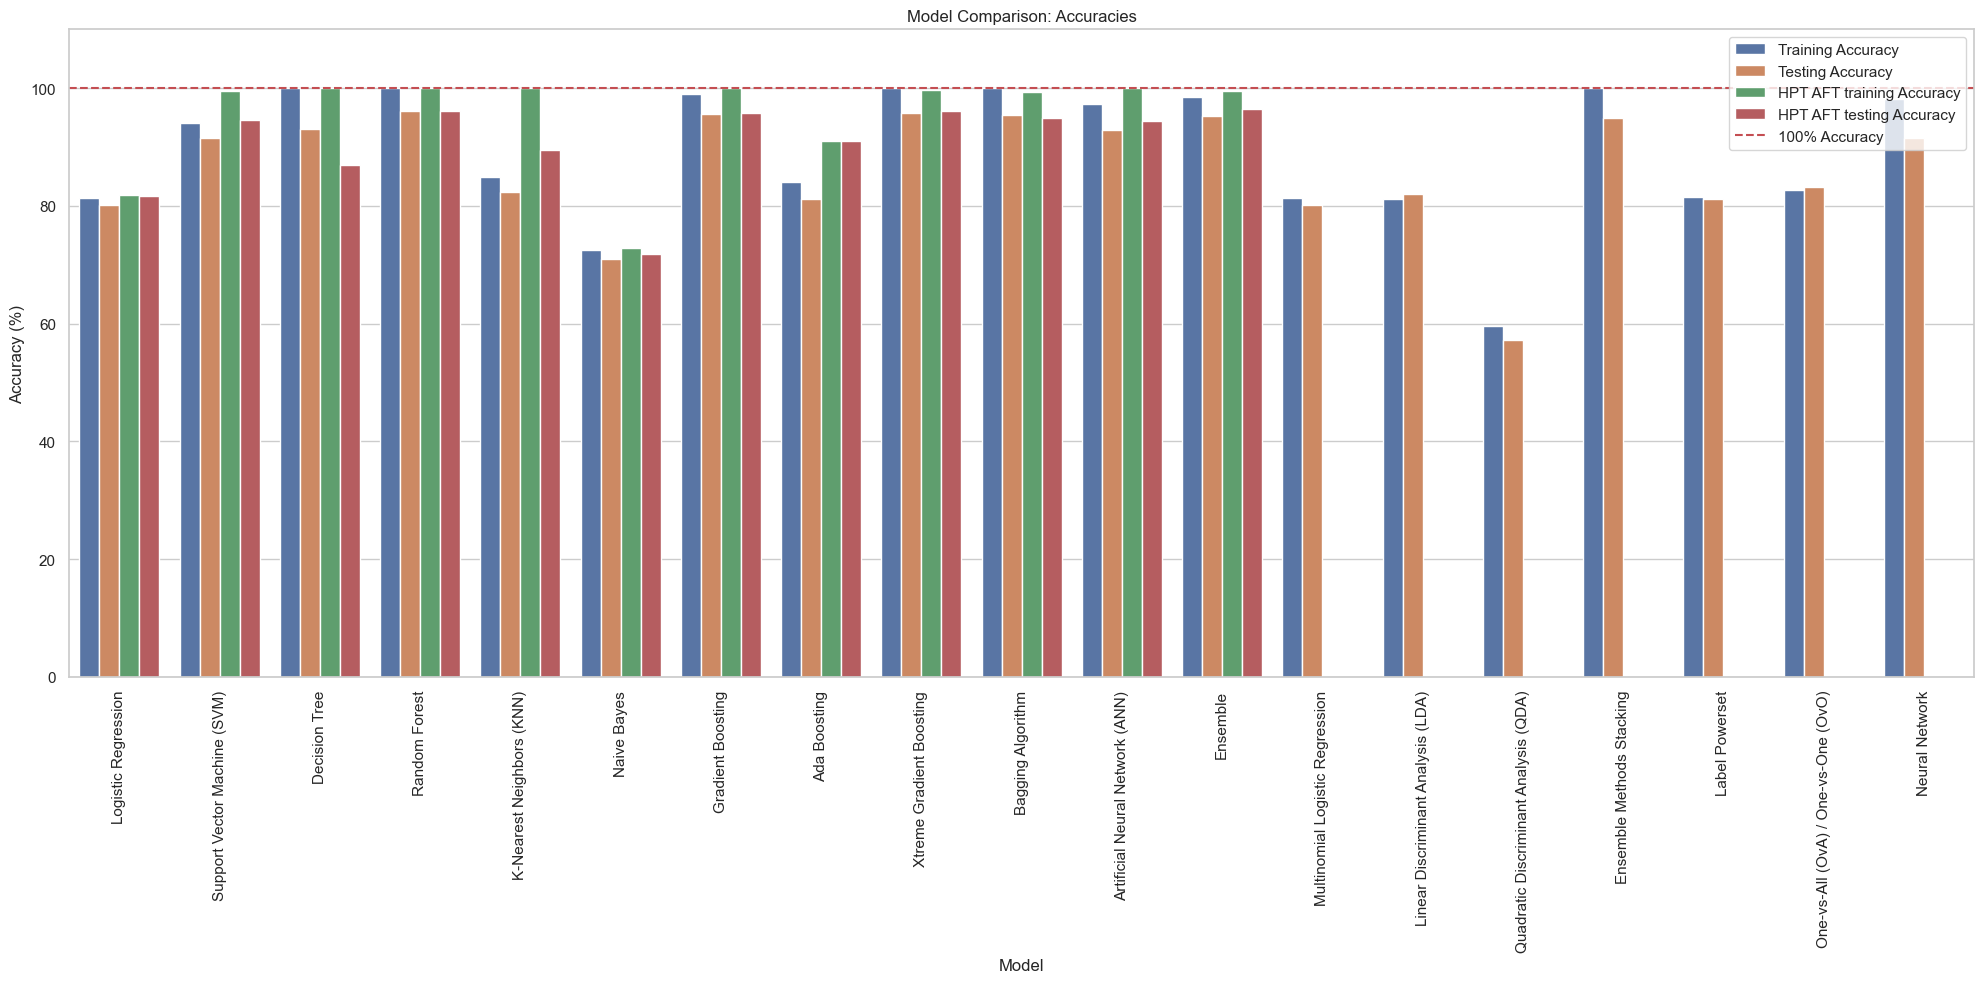

In [288]:
df = pd.DataFrame(Model_performance)

# Set the style
sns.set(style="whitegrid")

# Melt the dataframe for better visualization
df_melted = df.melt(id_vars='Model',
                     value_vars=['Training Accuracy', 'Testing Accuracy',
                                 'HPT AFT training Accuracy', 'HPT AFT testing Accuracy'],
                     var_name='Metric',
                     value_name='Accuracy')

# Create the plot
plt.figure(figsize=(20, 10))
sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Metric')
plt.title('Model Comparison: Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set limits for better visibility
plt.axhline(y=100, color='r', linestyle='--', label='100% Accuracy')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### **Final Conclusion**

In [292]:
# Define data as a dictionary
last_models = {
    "Model": ["Gradient Boosting", "Ensemble Model", "Random Forest", "Support Vector Machine (SVM)",
              "Ada Boosting","Xtreme Gradient Boosting","Bagging Algorithm","Neural Network"],
    "HPT Training Accuracy": [GB_HPT_training_accuracy*100, Esemble_HPY_training_accuracy*100,
                              RF_HPT_training_accuracy*100, SVM_HPT_training_accuracy*100,
                              AD_HPT_training_accuracy*100,XGB_HPT_training_accuracy*100,
                              BG_HPT_training_accuracy*100,NN_training_accuracy*100],
    "HPT Testing Accuracy": [GB_HPT_testing_accuracy*100, Esemble_HPY_testing_accuracy*100,
                             RF_HPT_testing_accuracy*100, SVM_HPT_testing_accuracy*100,
                             AD_HPT_testing_accuracy*100,XGB_HPT_testing_accuracy*100,
                             BG_HPT_testing_accuracy*100,NN_testing_accuracy*100]}

In [293]:
Best_Generalized_Model= pd.DataFrame(last_models)

In [294]:
print("Best Generalized Model (Balanced Performance)")
Best_Generalized_Model

Best Generalized Model (Balanced Performance)


Model  HPT Training Accuracy  HPT Testing Accuracy
0             Gradient Boosting             100.000000             95.731707
1                Ensemble Model              99.593082             96.493902
2                 Random Forest             100.000000             96.189024
3  Support Vector Machine (SVM)              99.542218             94.664634
4                  Ada Boosting              91.047813             91.006098
5      Xtreme Gradient Boosting              99.694812             96.189024
6             Bagging Algorithm              99.338759             94.969512
7                Neural Network              98.219734             91.463417

* **Bagging Algorithm:** Overfitting Risk Low(Strong performance, minimal overfitting).
* **Ensemble Model:** Overfitting Risk Low (Great balance of training & testing accuracy).
* **Support Vector Machine (SVM)** Overfitting Risk Low(Good improvement after tuning).
* **Xtreme Gradient Boosting:** Overfitting Risk Low (Slightly below Gradient Boosting).

#### Challenges Faced in Employee Performance Prediction Project
 **Data Quality and Preparation**
*  Handling Missing Data – Ensuring a complete dataset required imputation or removing inconsistent records.
* Class Imbalance – PerformanceRating was highly imbalanced, requiring SMOTE or class weighting to improve predictions.
* Feature Engineering – Selecting the best features (e.g., Job Satisfaction, Work-Life Balance) was crucial for model performance.

**Model Selection and Hyperparameter Tuning**
* Algorithm Selection – Different models like Random Forest, SVM, Gradient Boosting, and ANN showed varying results, making selection challenging.
* Overfitting Risk – Some models (e.g., Decision Tree, ANN) had 100% training accuracy but lower test accuracy, requiring regularization & dropout.
* Computational Cost – Ensemble models & deep learning required significant computational power for tuning and training.

**Performance Evaluation**
* Overfitting vs. Generalization – Many models showed high training accuracy but lower test accuracy, requiring dropout, early stopping, and tuning.
* Evaluation Metrics – Using confusion matrix, precision-recall, and accuracy curves helped validate performance beyond just accuracy.
* Hyperparameter Tuning – GridSearchCV and manual tuning for models improved generalization.

## Final Model Save

In [295]:
import pickle # use for save the model

In [296]:
with open("Employee Performance Prediction.pkl","wb") as f:  # save model
    pickle.dump(Ensemble_HPT_model,f) # save Esemble model

In [297]:
with open("Employee Performance Prediction.pkl","rb") as f: # load the model
    Model_new = pickle.load(f) # save as Mdel_new the file for prediction

In [298]:
X_array = np.array(X_test) # for easy to prediction we save the X in array form

In [299]:
X_array[0] # see the first row of X

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.23809524, 0.07142857,
       0.5       , 1.        , 0.9       , 0.66666667, 0.5       ,
       0.33333333, 0.        , 0.42857143, 0.33333333, 0.26315789,
       0.66666667, 0.33333333, 0.225     , 0.53846154, 0.14285714,
       0.53846154])

In [300]:
# see the prediction
Model_new.predict([[1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.23809524, 0.07142857,
       0.5       , 1.        , 0.9       , 0.66666667, 0.5       ,
       0.33333333, 0.        , 0.42857143, 0.33333333, 0.26315789,
       0.66666667, 0.33333333, 0.225     , 0.53846154, 0.14285714,
       0.53846154]])

array([1], dtype=int64)

In [301]:
y_test.head() # see the first actual output

226     1
805     1
266     2
910     2
2445    2
Name: PerformanceRating, dtype: int64

# Thank You......